In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy  as np
#import lightgbm as lgb

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
orial_data = pd.read_csv('data/train.csv',parse_dates=[2])
orial_data.head()
orial_data.shape[0]

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1017209

In [3]:
#数据拷贝一份进行处理，避免 对原始数据的改变
data_data = orial_data.copy()
#data_data.describe()
data_data.shape[0]

1017209

In [4]:
# 加载store 数据
store = pd.read_csv('data/store.csv')
data_store = store.copy()
#异常值处理
#'CompetitionOpenSinceYear': 0,
fill_values = { 'CompetitionOpenSinceYear': 0,'CompetitionDistance': 1, 'CompetitionOpenSinceMonth': 0, 'Promo2SinceWeek':0,'Promo2SinceYear':0,'PromoInterval':'None' }
data_store.fillna(value=fill_values,inplace = True)
store_drop_columns = ['PromoInterval']
data_store.drop(store_drop_columns,axis=1,inplace=True)
data_store.head(20)



Store StoreType Assortment  CompetitionDistance  \
0       1         c          a               1270.0   
1       2         a          a                570.0   
2       3         a          a              14130.0   
3       4         c          c                620.0   
4       5         a          a              29910.0   
5       6         a          a                310.0   
6       7         a          c              24000.0   
7       8         a          a               7520.0   
8       9         a          c               2030.0   
9      10         a          a               3160.0   
10     11         a          c                960.0   
11     12         a          c               1070.0   
12     13         d          a                310.0   
13     14         a          a               1300.0   
14     15         d          c               4110.0   
15     16         a          c               3270.0   
16     17         a          a                 50.0   
17     18         d          c              13840.0   
18     19         a          c               3240.0   
19     20         d          a               2340.0   

    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                         9.0                    2008.0       0   
1                        11.0                    2007.0       1   
2                        12.0                    2006.0       1   
3                         9.0                    2009.0       0   
4                         4.0                    2015.0       0   
5                        12.0                    2013.0       0   
6                         4.0                    2013.0       0   
7                        10.0                    2014.0       0   
8                         8.0                    2000.0       0   
9                         9.0                    2009.0       0   
10                       11.0                    2011.0       1   
11                        0.0                       0.0       1   
12                        0.0                       0.0       1   
13                        3.0                    2014.0       1   
14                        3.0                    2010.0       1   
15                        0.0                       0.0       0   
16                       12.0                    2005.0       1   
17                        6.0                    2010.0       1   
18                        0.0                       0.0       1   
19                        5.0                    2009.0       1   

    Promo2SinceWeek  Promo2SinceYear  
0               0.0              0.0  
1              13.0           2010.0  
2              14.0           2011.0  
3               0.0              0.0  
4               0.0              0.0  
5               0.0              0.0  
6               0.0              0.0  
7               0.0              0.0  
8               0.0              0.0  
9               0.0              0.0  
10              1.0           2012.0  
11             13.0           2010.0  
12             45.0           2009.0  
13             40.0           2011.0  
14             14.0           2011.0  
15              0.0              0.0  
16             26.0           2010.0  
17             14.0           2012.0  
18             22.0           2011.0  
19             40.0           2014.0

In [5]:
##'CompetitionOpenSinceYear': 0  换成 Promo2SinceYear

#data_store['CompetitionOpenSinceYear'].fillna(data_store['Promo2SinceYear'],inplace = True)
#data_store.head(20)

In [6]:
#构建competitionOpen 最近竞争对手开业多少个月

In [7]:
#加载test 数据
test = pd.read_csv('data/test.csv')
data_test = test.copy()
data_test.fillna(value={'Open':1},inplace=True)
data_test.head(10)

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0
5   6     10          4  2015-09-17   1.0      1            0              0
6   7     11          4  2015-09-17   1.0      1            0              0
7   8     12          4  2015-09-17   1.0      1            0              0
8   9     13          4  2015-09-17   1.0      1            0              0
9  10     14          4  2015-09-17   1.0      1            0              0

In [8]:
#将字符的属性转换成数字
replace_data = {'a':1,'b':2,'c':3,'d':4}
print(type(data_store))
print(type(data_store['Assortment']))
print(type(data_store.Assortment))
data_store['Assortment'].replace(replace_data,inplace=True)
data_store['StoreType'].replace(replace_data,inplace=True)

data_store.head(10)

data_data['StateHoliday'].replace(replace_data,inplace=True)
data_data['StateHoliday'] = data_data['StateHoliday'].apply(pd.to_numeric)
data_data.shape[0]

data_test['StateHoliday'].replace(replace_data,inplace=True)
data_test['StateHoliday'] = data_test['StateHoliday'].apply(pd.to_numeric)
print(data_test['StateHoliday'].unique())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
[0 1]


In [9]:
# 进行归一化 对CompetitionDistance，
'''
scaler = MinMaxScaler()
x = data_store['CompetitionDistance'].values.reshape(-1,1)
data_store['CompetitionDistance'] = scaler.fit_transform(x)
data_store.head(5)
'''

"\nscaler = MinMaxScaler()\nx = data_store['CompetitionDistance'].values.reshape(-1,1)\ndata_store['CompetitionDistance'] = scaler.fit_transform(x)\ndata_store.head(5)\n"

In [10]:
#pd.get_dummies(data_store)
data_test.head(1)

Id  Store  DayOfWeek        Date  Open  Promo  StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1             0              0

In [11]:
data_data.head(3)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   

   SchoolHoliday  
0              1  
1              1  
2              1

In [12]:
# 提取出月份、年份,数据增加年份和月份的列
import time, datetime
def conver_date(data):
    print(data.head(5))
    #data_month = pd.to_datetime(data['Date'],format='%Y-%m-%d %H:%M:%S')
    data_date = pd.to_datetime(data['Date'],format='%Y/%m/%d')
    data['year'] = data_date.dt.year
    data['month'] = data_date.dt.month
    data['day'] = data_date.dt.day
    data['WweekOfYear']= data_date.dt.weekofyear
    data['Date'] = data_date
    #data.drop('Date',axis=1,inplace=True)
    return data
data_data = conver_date(data_data)
data_test = conver_date(data_test)
print(data_test.head(5))
print("........................................")
print(data_data.tail(20))
    
#print(time.strftime('%Y-%m-%d %H:%M:%S'))
#data_month = pd.to_datetime(data_data['Date'],format='%Y-%m-%d %H:%M:%S')

#record['ym']=record['HAPPEN_TIME']
#data_year =data_data['Date'].apply(lambda x:x.split('-')[0])
#data_date = pd.to_datetime(data_data['Date'],format='%Y/%m/%d')
#data_data['year'] = data_date.dt.year
#data_data['month'] = data_date.dt.month
#data_data['day'] = data_date.dt.day
#data_data.drop('Date',axis=1,inplace=True)


#month2str = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
#data_data['month2str'] = data_data.month.map(month2str)
#data_data.head(25)
#data_data.shape[0]

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995       1498     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Id  Store  DayOfWeek        Date  Open  Promo  StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1             0              0
1   2      3          4  2015-09-17   1.0      1             0              0
2   3      7          4  2015-09-17   1.0      1             0              0
3   4      8          4  2015-09-17   1.0      1             0              0
4   5      9         

In [13]:
data_data.shape[0]
#选取open = 1 的数据
data_data = data_data.loc[(data_data['Open'] == 1)]
print(data_data.shape[0])
data_data  = data_data.loc[(data_data['Sales'] > 0)]
print(data_data.shape[0])


844392
844338


In [14]:
#选取某一个店的ID,获取其销售记录 并显示其每个月的销售情况
def get_month_sales_by_id(id):
    store_data = data_data.loc[(data_data['Store'] == 1)]
    store_data_2013 = store_data.loc[store_data['year'] == 2013]
    store_data_2014 = store_data.loc[store_data['year'] == 2014]
    store_data_2015 = store_data.loc[store_data['year'] == 2015]
    
    #计算每年每个月的销售情况
    store_data_2013_month = store_data_2013.groupby(by=['month'])['Sales'].sum()
    store_data_2014_month = store_data_2014.groupby(by=['month'])['Sales'].sum()
    store_data_2015_month = store_data_2015.groupby(by=['month'])['Sales'].sum()
    store_data_2015_month.rename(columns={"month":"sum_of_value"},inplace=True)
    
    #print(store_data_2015_month.to_frame().columns())
    #print(store_data_2015_month[1])
    #print(store_data_2015_month.head(20))
    store_data_month={}
    store_data_month['2013'] = store_data_2013_month
    store_data_month['2014'] = store_data_2014_month
    store_data_month['2015'] = store_data_2015_month
    
    return store_data_month
a=get_month_sales_by_id(5)
print("2014 1",a['2014'][1])

2014 1 118814


In [15]:
month_info = get_month_sales_by_id(5)
month_info['2015'][8] = month_info['2015'][9] = month_info['2015'][10] =  month_info['2015'][11] = month_info['2015'][12] = 0
for i in month_info:
    print(i)
    print(month_info[i])

2013
month
1     128431
2     125271
3     145169
4     118009
5     118225
6     113411
7     128032
8     118320
9     108867
10    114641
11    127596
12    145168
Name: Sales, dtype: int64
2014
month
1     118814
2     110434
3     116467
4     115292
5     117715
6     107905
7     122604
8     111004
9     106398
10    114897
11    130852
12    161026
Name: Sales, dtype: int64
2015
month
1     119602
2     106635
3     118917
4     110655
5     105220
6     110011
7     121266
8          0
9          0
10         0
11         0
12         0
dtype: int64


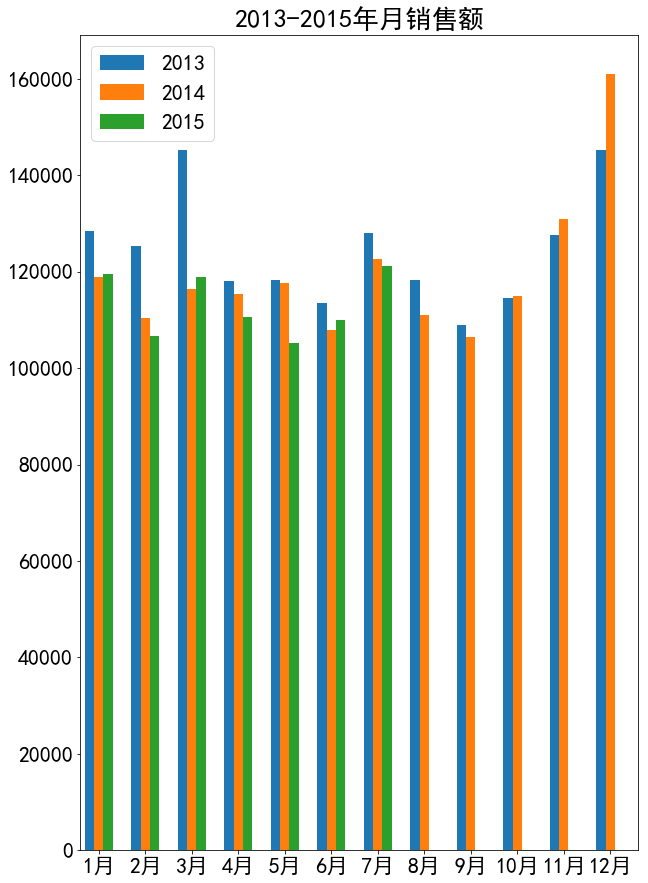

In [16]:


#解决中文乱码的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 22

#X=[0,1,2,3,4,5,6,7,8,9,10,11]
x_labels = ['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月']
X = np.arange(12)
bar_width = 0.2
Y=[222,42,455,664,454,334,222,42,455,664,454,334]

fig = plt.figure(figsize=(10,15))
ax = plt.subplot()
bars = []
years = []
ij = 0
for i in month_info:
    ij = ij +1
    bar_i = ax.bar(X+bar_width*ij,month_info[i],bar_width)
    bars.append(bar_i)
    years.append(i)

#bar_1 = ax.bar(X+bar_width,month_info['2013'],bar_width)
#bar_2 = ax.bar(X+bar_width*2,month_info['2014'],bar_width)
#bar_3 = ax.bar(X+bar_width*3,month_info['2015'],bar_width)
ax.set_xticklabels(x_labels)
plt.xticks(X+bar_width*2)
plt.xlim(0,len(x_labels))
plt.title('2013-2015年月销售额')
handles, labels = ax.get_legend_handles_labels()

plt.legend(bars, years,loc = 'best')
#plt.set_xticks(x_labels)
#plt.savefig('./year_month.jpg')
plt.show()


In [17]:
#按照DATE排序 
data_data.sort_values(by = 'Date',axis = 0,ascending = False)
data_data.head(20)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0       1          5 2015-07-31   5263        555     1      1             0   
1       2          5 2015-07-31   6064        625     1      1             0   
2       3          5 2015-07-31   8314        821     1      1             0   
3       4          5 2015-07-31  13995       1498     1      1             0   
4       5          5 2015-07-31   4822        559     1      1             0   
5       6          5 2015-07-31   5651        589     1      1             0   
6       7          5 2015-07-31  15344       1414     1      1             0   
7       8          5 2015-07-31   8492        833     1      1             0   
8       9          5 2015-07-31   8565        687     1      1             0   
9      10          5 2015-07-31   7185        681     1      1             0   
10     11          5 2015-07-31  10457       1236     1      1             0   
11     12          5 2015-07-31   8959        962     1      1             0   
12     13          5 2015-07-31   8821        568     1      1             0   
13     14          5 2015-07-31   6544        710     1      1             0   
14     15          5 2015-07-31   9191        766     1      1             0   
15     16          5 2015-07-31  10231        979     1      1             0   
16     17          5 2015-07-31   8430        946     1      1             0   
17     18          5 2015-07-31  10071        936     1      1             0   
18     19          5 2015-07-31   8234        718     1      1             0   
19     20          5 2015-07-31   9593        974     1      1             0   

    SchoolHoliday  year  month  day  WweekOfYear  
0               1  2015      7   31           31  
1               1  2015      7   31           31  
2               1  2015      7   31           31  
3               1  2015      7   31           31  
4               1  2015      7   31           31  
5               1  2015      7   31           31  
6               1  2015      7   31           31  
7               1  2015      7   31           31  
8               1  2015      7   31           31  
9               1  2015      7   31           31  
10              1  2015      7   31           31  
11              1  2015      7   31           31  
12              0  2015      7   31           31  
13              1  2015      7   31           31  
14              1  2015      7   31           31  
15              1  2015      7   31           31  
16              1  2015      7   31           31  
17              1  2015      7   31           31  
18              1  2015      7   31           31  
19              0  2015      7   31           31

In [18]:
data_data = data_data.merge(data_store,left_on = 'Store',right_on = 'Store',how="left")
print(data_data.shape[0])
data_data.head(10)
#

844338


Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995       1498     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   
5      6          5 2015-07-31   5651        589     1      1             0   
6      7          5 2015-07-31  15344       1414     1      1             0   
7      8          5 2015-07-31   8492        833     1      1             0   
8      9          5 2015-07-31   8565        687     1      1             0   
9     10          5 2015-07-31   7185        681     1      1             0   

   SchoolHoliday  year       ...         day  WweekOfYear  StoreType  \
0              1  2015       ...          31           31          3   
1              1  2015       ...          31           31          1   
2              1  2015       ...          31           31          1   
3              1  2015       ...          31           31          3   
4              1  2015       ...          31           31          1   
5              1  2015       ...          31           31          1   
6              1  2015       ...          31           31          1   
7              1  2015       ...          31           31          1   
8              1  2015       ...          31           31          1   
9              1  2015       ...          31           31          1   

   Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0           1               1270.0                        9.0   
1           1                570.0                       11.0   
2           1              14130.0                       12.0   
3           3                620.0                        9.0   
4           1              29910.0                        4.0   
5           1                310.0                       12.0   
6           3              24000.0                        4.0   
7           1               7520.0                       10.0   
8           3               2030.0                        8.0   
9           1               3160.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  
0                    2008.0       0              0.0              0.0  
1                    2007.0       1             13.0           2010.0  
2                    2006.0       1             14.0           2011.0  
3                    2009.0       0              0.0              0.0  
4                    2015.0       0              0.0              0.0  
5                    2013.0       0              0.0              0.0  
6                    2013.0       0              0.0              0.0  
7                    2014.0       0              0.0              0.0  
8                    2000.0       0              0.0              0.0  
9                    2009.0       0              0.0              0.0  

[10 rows x 21 columns]

In [19]:
#构建competitionOpen 最近竞争对手开业多少个月
data_data['CompetitionOpen'] = 12 *(data_data['year']-data_data['CompetitionOpenSinceYear'])+(data_data['month']-data_data['CompetitionOpenSinceMonth'])
data_data.head(5)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995       1498     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  year       ...         WweekOfYear  StoreType  Assortment  \
0              1  2015       ...                  31          3           1   
1              1  2015       ...                  31          1           1   
2              1  2015       ...                  31          1           1   
3              1  2015       ...                  31          3           3   
4              1  2015       ...                  31          1           1   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1                570.0                       11.0                    2007.0   
2              14130.0                       12.0                    2006.0   
3                620.0                        9.0                    2009.0   
4              29910.0                        4.0                    2015.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  CompetitionOpen  
0       0              0.0              0.0             82.0  
1       1             13.0           2010.0             92.0  
2       1             14.0           2011.0            103.0  
3       0              0.0              0.0             70.0  
4       0              0.0              0.0              3.0  

[5 rows x 22 columns]

In [20]:
#构建特征PromoOpen 开始促销多少个月
data_data['PromoOpen'] = 12*(data_data['year']-data_data['Promo2SinceYear'])+(data_data['WweekOfYear']-data_data['Promo2SinceWeek'])/4.0
data_data.head(5)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995       1498     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  year    ...      StoreType  Assortment  CompetitionDistance  \
0              1  2015    ...              3           1               1270.0   
1              1  2015    ...              1           1                570.0   
2              1  2015    ...              1           1              14130.0   
3              1  2015    ...              3           3                620.0   
4              1  2015    ...              1           1              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear  CompetitionOpen  PromoOpen  
0              0.0              0.0             82.0   24187.75  
1             13.0           2010.0             92.0      64.50  
2             14.0           2011.0            103.0      52.25  
3              0.0              0.0             70.0   24187.75  
4              0.0              0.0              3.0   24187.75  

[5 rows x 23 columns]

In [21]:
#test 数据获取open=1 的数据
print(data_test.shape[0])
data_test_noOpen = data_test.loc[(data_test['Open'] == 0)]
data_test_noPenIds = data_test_noOpen['Id']

data_test = data_test.loc[(data_test['Open'] == 1)]
data_test_ids = data_test['Id']
data_test.drop(['Id'],axis=1,inplace = True)
print(data_test.shape[0])
print(data_test_noOpen.shape[0])
print(data_test_noOpen)
#data=data_test[~((data_test['Open']==0)|(data_test['Open']==1))]
#print(data)

41088
35104
5984
          Id  Store  DayOfWeek       Date  Open  Promo  StateHoliday  \
543      544    703          4 2015-09-17   0.0      1             0   
676      677    879          4 2015-09-17   0.0      1             0   
840      841   1097          4 2015-09-17   0.0      1             0   
1399    1400    703          3 2015-09-16   0.0      1             0   
1532    1533    879          3 2015-09-16   0.0      1             0   
1696    1697   1097          3 2015-09-16   0.0      1             0   
2255    2256    703          2 2015-09-15   0.0      1             0   
2388    2389    879          2 2015-09-15   0.0      1             0   
2552    2553   1097          2 2015-09-15   0.0      1             0   
3111    3112    703          1 2015-09-14   0.0      1             0   
3244    3245    879          1 2015-09-14   0.0      1             0   
3408    3409   1097          1 2015-09-14   0.0      1             0   
3424    3425      1          7 2015-09-13   0.0

In [22]:
data_test = data_test.merge(data_store,left_on = 'Store',right_on = 'Store',how="left")
print(data_test.shape[0])
data_test.head(10)

35104


Store  DayOfWeek       Date  Open  Promo  StateHoliday  SchoolHoliday  \
0      1          4 2015-09-17   1.0      1             0              0   
1      3          4 2015-09-17   1.0      1             0              0   
2      7          4 2015-09-17   1.0      1             0              0   
3      8          4 2015-09-17   1.0      1             0              0   
4      9          4 2015-09-17   1.0      1             0              0   
5     10          4 2015-09-17   1.0      1             0              0   
6     11          4 2015-09-17   1.0      1             0              0   
7     12          4 2015-09-17   1.0      1             0              0   
8     13          4 2015-09-17   1.0      1             0              0   
9     14          4 2015-09-17   1.0      1             0              0   

   year  month  day  WweekOfYear  StoreType  Assortment  CompetitionDistance  \
0  2015      9   17           38          3           1               1270.0   
1  2015      9   17           38          1           1              14130.0   
2  2015      9   17           38          1           3              24000.0   
3  2015      9   17           38          1           1               7520.0   
4  2015      9   17           38          1           3               2030.0   
5  2015      9   17           38          1           1               3160.0   
6  2015      9   17           38          1           3                960.0   
7  2015      9   17           38          1           3               1070.0   
8  2015      9   17           38          4           1                310.0   
9  2015      9   17           38          1           1               1300.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       12.0                    2006.0       1   
2                        4.0                    2013.0       0   
3                       10.0                    2014.0       0   
4                        8.0                    2000.0       0   
5                        9.0                    2009.0       0   
6                       11.0                    2011.0       1   
7                        0.0                       0.0       1   
8                        0.0                       0.0       1   
9                        3.0                    2014.0       1   

   Promo2SinceWeek  Promo2SinceYear  
0              0.0              0.0  
1             14.0           2011.0  
2              0.0              0.0  
3              0.0              0.0  
4              0.0              0.0  
5              0.0              0.0  
6              1.0           2012.0  
7             13.0           2010.0  
8             45.0           2009.0  
9             40.0           2011.0

In [23]:
#构建特征PromoOpen 开始促销多少个月
data_test['PromoOpen'] = 12*(data_data['year']-data_test['Promo2SinceYear'])+(data_test['WweekOfYear']-data_test['Promo2SinceWeek'])/4.0

data_test['CompetitionOpen'] = 12 *(data_test['year']-data_test['CompetitionOpenSinceYear'])+(data_test['month']-data_test['CompetitionOpenSinceMonth'])
data_test.head(5)

Store  DayOfWeek       Date  Open  Promo  StateHoliday  SchoolHoliday  \
0      1          4 2015-09-17   1.0      1             0              0   
1      3          4 2015-09-17   1.0      1             0              0   
2      7          4 2015-09-17   1.0      1             0              0   
3      8          4 2015-09-17   1.0      1             0              0   
4      9          4 2015-09-17   1.0      1             0              0   

   year  month  day       ...         StoreType  Assortment  \
0  2015      9   17       ...                 3           1   
1  2015      9   17       ...                 1           1   
2  2015      9   17       ...                 1           3   
3  2015      9   17       ...                 1           1   
4  2015      9   17       ...                 1           3   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1              14130.0                       12.0                    2006.0   
2              24000.0                        4.0                    2013.0   
3               7520.0                       10.0                    2014.0   
4               2030.0                        8.0                    2000.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoOpen  CompetitionOpen  
0       0              0.0              0.0    24189.5             84.0  
1       1             14.0           2011.0       54.0            105.0  
2       0              0.0              0.0    24189.5             29.0  
3       0              0.0              0.0    24189.5             11.0  
4       0              0.0              0.0    24189.5            181.0  

[5 rows x 21 columns]

In [24]:
#test 
'''
#归一化处理
scaler = MinMaxScaler()
x = data_data['PromoOpen'].values.reshape(-1,1)
data_data['PromoOpen'] = scaler.fit_transform(x)

x = data_data['CompetitionOpen'].values.reshape(-1,1)
data_data['CompetitionOpen'] = scaler.fit_transform(x)

#归一化 测试集
x = data_test['PromoOpen'].values.reshape(-1,1)
data_test['PromoOpen'] = scaler.fit_transform(x)

x = data_test['CompetitionOpen'].values.reshape(-1,1)
data_test['CompetitionOpen'] = scaler.fit_transform(x)
'''

"\n#归一化处理\nscaler = MinMaxScaler()\nx = data_data['PromoOpen'].values.reshape(-1,1)\ndata_data['PromoOpen'] = scaler.fit_transform(x)\n\nx = data_data['CompetitionOpen'].values.reshape(-1,1)\ndata_data['CompetitionOpen'] = scaler.fit_transform(x)\n\n#归一化 测试集\nx = data_test['PromoOpen'].values.reshape(-1,1)\ndata_test['PromoOpen'] = scaler.fit_transform(x)\n\nx = data_test['CompetitionOpen'].values.reshape(-1,1)\ndata_test['CompetitionOpen'] = scaler.fit_transform(x)\n"

In [25]:
#dummies 独热编码
print(data_data.shape[0])
if 'StoreType_1'  not in data_data.columns:
    data_data = pd.get_dummies(data_data,columns=['StoreType','StateHoliday'])
    print(data_data.shape)
    print(data_data.columns.values)
    print(data_data.head(5))
    print("*************")
    print(data_test.shape[0])
    data_test = pd.get_dummies(data_test,columns=['StoreType','StateHoliday'])
    data_test['StateHoliday_2'] = 0
    data_test['StateHoliday_3'] = 0
    data_data.sort_index(axis=1,inplace=True)
    data_test.sort_index(axis=1,inplace=True)
    print(data_test.shape)
    print(data_test.columns.values)
    print(data_test.head(5))

844338
(844338, 29)
['Store' 'DayOfWeek' 'Date' 'Sales' 'Customers' 'Open' 'Promo'
 'SchoolHoliday' 'year' 'month' 'day' 'WweekOfYear' 'Assortment'
 'CompetitionDistance' 'CompetitionOpenSinceMonth'
 'CompetitionOpenSinceYear' 'Promo2' 'Promo2SinceWeek' 'Promo2SinceYear'
 'CompetitionOpen' 'PromoOpen' 'StoreType_1' 'StoreType_2' 'StoreType_3'
 'StoreType_4' 'StateHoliday_0' 'StateHoliday_1' 'StateHoliday_2'
 'StateHoliday_3']
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5 2015-07-31   5263        555     1      1              1   
1      2          5 2015-07-31   6064        625     1      1              1   
2      3          5 2015-07-31   8314        821     1      1              1   
3      4          5 2015-07-31  13995       1498     1      1              1   
4      5          5 2015-07-31   4822        559     1      1              1   

   year  month       ...        CompetitionOpen  PromoOpen  StoreType_1  \
0  2015      7

In [26]:
data_data.sort_index(axis=1,inplace=True)
data_test.sort_index(axis=1,inplace=True)
data_data.head(10)

Assortment  CompetitionDistance  CompetitionOpen  \
0           1               1270.0             82.0   
1           1                570.0             92.0   
2           1              14130.0            103.0   
3           3                620.0             70.0   
4           1              29910.0              3.0   
5           1                310.0             19.0   
6           3              24000.0             27.0   
7           1               7520.0              9.0   
8           3               2030.0            179.0   
9           1               3160.0             70.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Customers       Date  \
0                        9.0                    2008.0        555 2015-07-31   
1                       11.0                    2007.0        625 2015-07-31   
2                       12.0                    2006.0        821 2015-07-31   
3                        9.0                    2009.0       1498 2015-07-31   
4                        4.0                    2015.0        559 2015-07-31   
5                       12.0                    2013.0        589 2015-07-31   
6                        4.0                    2013.0       1414 2015-07-31   
7                       10.0                    2014.0        833 2015-07-31   
8                        8.0                    2000.0        687 2015-07-31   
9                        9.0                    2009.0        681 2015-07-31   

   DayOfWeek  Open  Promo  ...   StateHoliday_3  Store  StoreType_1  \
0          5     1      1  ...                0      1            0   
1          5     1      1  ...                0      2            1   
2          5     1      1  ...                0      3            1   
3          5     1      1  ...                0      4            0   
4          5     1      1  ...                0      5            1   
5          5     1      1  ...                0      6            1   
6          5     1      1  ...                0      7            1   
7          5     1      1  ...                0      8            1   
8          5     1      1  ...                0      9            1   
9          5     1      1  ...                0     10            1   

   StoreType_2  StoreType_3  StoreType_4  WweekOfYear  day  month  year  
0            0            1            0           31   31      7  2015  
1            0            0            0           31   31      7  2015  
2            0            0            0           31   31      7  2015  
3            0            1            0           31   31      7  2015  
4            0            0            0           31   31      7  2015  
5            0            0            0           31   31      7  2015  
6            0            0            0           31   31      7  2015  
7            0            0            0           31   31      7  2015  
8            0            0            0           31   31      7  2015  
9            0            0            0           31   31      7  2015  

[10 rows x 29 columns]

In [27]:

#duplicate_columns = data_data.columns[data_data.columns.duplicated()]
#print(duplicate_columns)
data_data.shape[0]

#print(type(data_data['stateHoliday'][63557]))
 

844338

In [28]:
from math import sqrt
def rmspe(y,y_pre):
    #print("y-y_pre/y",(y-y_pre)/y)
    #print("(y-y_pre/y)**2",((y-y_pre)/y)**2)
    a = np.mean(((y-y_pre)/y)**2)
    return sqrt(a)
    #print('y:',y)
    #print('y_pre:',y_pre)
    #print("y/y_pre:",(y_pre / y - 1)**2)
    #print("mean:",np.mean((y_pre / y - 1)**2))


In [29]:
import math
def rmspe_xgboost(preds, dtrain):       # written by myself
    labels = np.expm1(dtrain.get_label())
    preds = np.expm1(preds)
    #print("***labels:*****",labels)
    #print("***preds:*****",preds)
    
    # return a pair metric_name, result
    # since preds are margin(before logistic transformation, cutoff at 0)
    #err = np.mean(((labels-preds)/labels)**2)
    return 'rmspe_xgboost',rmspe(labels,preds)

In [30]:
'''
# 训练集和测试集随机划分
#train_data = data_data.drop(['Sales'],axis=1)
if 'Customers' in data_data.columns:
    data_data.drop(['Customers'],axis=1,inplace=True)
X_train, X_valid = train_test_split(data_data, test_size=0.2, random_state=10)
#print("+++++++++++++++++++++++++++++++++++")
#print(X_train)
#print(X_valid)
y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)
#y_train = X_train.Sales
#y_valid = X_valid.Sales

print(type(X_train.Sales))
print("x_TRAIN:",X_train.Sales.shape[0])
#X_train.drop(['Sales'],axis=1,inplace=True)
print("####################")
#print(type(X_train))
#print(type(y_train))
X_train.drop(['Sales'],axis=1,inplace=True)
X_valid.drop(['Sales'],axis=1,inplace=True)

dtrain = xgb.DMatrix(X_train,label=y_train)
dvalid = xgb.DMatrix(X_valid,label=y_valid)
print(X_train.shape[0])

print(type(y_train))
print("y_train:",y_train.shape[0])
#print(X_train.Sales.unique())
num_boost_round = 50
watch_list= [(dtrain, 'train'), (dvalid, 'valid')]
params = {"objective": "reg:linear","booster": "gbtree", "eta": 0.5,"max_depth": 10,"min_child_weight":5}
print("start train data by xgboost")
xgboost_model = xgb.train(params, dtrain, num_boost_round,evals=watch_list)
print("valid....")
y_pre = xgboost_model.predict(dvalid)


print(y_pre)
print(len(y_pre))
print(len(y_valid))
print(type(y_valid))
'''

'\n# 训练集和测试集随机划分\n#train_data = data_data.drop([\'Sales\'],axis=1)\nif \'Customers\' in data_data.columns:\n    data_data.drop([\'Customers\'],axis=1,inplace=True)\nX_train, X_valid = train_test_split(data_data, test_size=0.2, random_state=10)\n#print("+++++++++++++++++++++++++++++++++++")\n#print(X_train)\n#print(X_valid)\ny_train = np.log1p(X_train.Sales)\ny_valid = np.log1p(X_valid.Sales)\n#y_train = X_train.Sales\n#y_valid = X_valid.Sales\n\nprint(type(X_train.Sales))\nprint("x_TRAIN:",X_train.Sales.shape[0])\n#X_train.drop([\'Sales\'],axis=1,inplace=True)\nprint("####################")\n#print(type(X_train))\n#print(type(y_train))\nX_train.drop([\'Sales\'],axis=1,inplace=True)\nX_valid.drop([\'Sales\'],axis=1,inplace=True)\n\ndtrain = xgb.DMatrix(X_train,label=y_train)\ndvalid = xgb.DMatrix(X_valid,label=y_valid)\nprint(X_train.shape[0])\n\nprint(type(y_train))\nprint("y_train:",y_train.shape[0])\n#print(X_train.Sales.unique())\nnum_boost_round = 50\nwatch_list= [(dtrain, \'train\

In [31]:
# 训练集和测试集手动划分
if 'Customers' in data_data.columns:
    data_data.drop(['Customers'],axis=1,inplace=True)

#X_train = data_data[0:813766]
#X_valid = data_data[813766::]
#取两周收据为valid
split_date = '2015/7/18'
X_train = data_data[data_data.Date < split_date]
X_valid = data_data[data_data.Date >= split_date]
#print(X_train)
#print("*********************")
#print(X_valid)
#X_train, X_valid = train_test_split(data_data, test_size=0.2, random_state=10)
#print("+++++++++++++++++++++++++++++++++++")
#print(X_train)
#print(X_valid)

y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)
#y_train = X_train.Sales
#y_valid = X_valid.Sales

print(type(X_train.Sales))
print("x_TRAIN:",X_train.Sales.shape[0])
#X_train.drop(['Sales'],axis=1,inplace=True)
print("####################")
#print(type(X_train))
#print(type(y_train))
X_valid_sales =X_valid['Sales'] 
X_train.drop(['Sales'],axis=1,inplace=True)
X_valid.drop(['Sales'],axis=1,inplace=True)

X_train.drop(['Date'],axis=1,inplace=True)
X_valid.drop(['Date'],axis=1,inplace=True)

dtrain = xgb.DMatrix(X_train,label=y_train)
dvalid = xgb.DMatrix(X_valid,label=y_valid)
print(X_train.shape[0])

print(type(y_train))
print("y_train:",y_train.shape[0])
print("***********************************")
print(X_valid.shape[0])
#print(X_train.Sales.unique())


<class 'pandas.core.series.Series'>
x_TRAIN: 830918
####################


d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


830918
<class 'pandas.core.series.Series'>
y_train: 830918
***********************************
13420


In [32]:
#************** 训练得分的读写 ***********************
import json
def write_record(data,file):
    jsObj = json.dumps(data)
    fileObject = open(file, 'w')
    fileObject.write(jsObj)
    fileObject.close()

# 读log 记录
def read_record(file):
    fileObject = open(file, 'r')
    file_txt = fileObject.read()
    json_content = json.loads(file_txt)
    return json_content

In [241]:
#********************开始训练***************************
num_boost_round = 40000
min_child_weight = 4
max_depth=8
eta = 0.005
watch_list= [(dtrain, 'train'), (dvalid, 'valid')]
evals_result = dict()
params = {"objective": "reg:linear","booster": "gbtree", "eta": eta,"max_depth":max_depth,"min_child_weight":min_child_weight} #"min_child_weight":5
print("start train data by xgboost")
xgboost_model = xgb.train(params, dtrain, num_boost_round,feval=rmspe_xgboost,evals=watch_list,verbose_eval=10,early_stopping_rounds=500,evals_result=evals_result)
print("valid....")
#保存模型
model_name = "model/num"+str(num_boost_round)+"_weight"+str(min_child_weight)+"_maxdepth"+str(max_depth)+"_eta"+str(eta)+".model"
log_name= "record/num"+str(num_boost_round)+"_weight"+str(min_child_weight)+"_maxdepth"+str(max_depth)+"_eta"+str(eta)+".txt"
xgboost_model.save_model(model_name)
print("save...",model_name)
write_record(evals_result,log_name)
print(".....save log ..........",log_name)


start train data by xgboost
[12:05:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=8
[0]	train-rmse:8.22733	valid-rmse:8.23217	train-rmspe_xgboost:0.999876	valid-rmspe_xgboost:0.999877
Multiple eval metrics have been passed: 'valid-rmspe_xgboost' will be used for early stopping.

Will train until valid-rmspe_xgboost hasn't improved in 500 rounds.
[12:05:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=8
[12:05:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=8
[12:05:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=8
[12:05:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0

[12:06:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=8
[12:06:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=8
[12:06:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=8
[12:06:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=8
[12:06:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=8
[12:06:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=8
[12:06:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes,

[12:06:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 0 pruned nodes, max_depth=8
[12:06:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=8
[12:06:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=8
[12:06:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 0 pruned nodes, max_depth=8
[12:06:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned nodes, max_depth=8
[12:06:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=8
[12:06:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes,

[12:07:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=8
[12:07:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=8
[12:07:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=8
[12:07:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=8
[160]	train-rmse:3.70169	valid-rmse:3.70207	train-rmspe_xgboost:0.973465	valid-rmspe_xgboost:0.973577
[12:07:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=8
[12:07:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=8
[12:07:08] d:\bu

[12:07:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=8
[210]	train-rmse:2.88837	valid-rmse:2.88872	train-rmspe_xgboost:0.940133	valid-rmspe_xgboost:0.940344
[12:07:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=8
[12:07:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=8
[12:07:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 324 extra nodes, 0 pruned nodes, max_depth=8
[12:07:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=8
[12:07:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 0 pruned nodes, max_depth=8
[12:07:36] d:\bu

[12:07:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes, 0 pruned nodes, max_depth=8
[12:08:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes, 0 pruned nodes, max_depth=8
[12:08:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes, 0 pruned nodes, max_depth=8
[12:08:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 288 extra nodes, 0 pruned nodes, max_depth=8
[12:08:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=8
[12:08:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 326 extra nodes, 0 pruned nodes, max_depth=8
[12:08:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes,

[12:08:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 312 extra nodes, 0 pruned nodes, max_depth=8
[12:08:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 360 extra nodes, 0 pruned nodes, max_depth=8
[12:08:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes, 0 pruned nodes, max_depth=8
[12:08:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=8
[12:08:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=8
[12:08:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=8
[320]	train-rmse:1.68394	valid-rmse:1.68297	train-rmspe_xgboost:0.801571	valid-rmspe_xgboost:0.80143
[12:08:29] d:\bui

[12:08:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[12:08:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 348 extra nodes, 0 pruned nodes, max_depth=8
[12:08:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[370]	train-rmse:1.32485	valid-rmse:1.32457	train-rmspe_xgboost:0.717111	valid-rmspe_xgboost:0.716582
[12:08:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[12:08:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 316 extra nodes, 0 pruned nodes, max_depth=8
[12:08:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[12:08:56] d:\bu

[12:09:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[12:09:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[12:09:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[12:09:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 316 extra nodes, 0 pruned nodes, max_depth=8
[12:09:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[12:09:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[12:09:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes,

[12:09:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[12:09:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[12:09:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 0 pruned nodes, max_depth=8
[12:09:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[12:09:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[12:09:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[12:09:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes,

[12:10:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[12:10:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[12:10:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12:10:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[530]	train-rmse:0.65023	valid-rmse:0.65331	train-rmspe_xgboost:0.459221	valid-rmspe_xgboost:0.454789
[12:10:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[12:10:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[12:10:19] d:\bu

[12:10:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[580]	train-rmse:0.536385	valid-rmse:0.540134	train-rmspe_xgboost:0.402279	valid-rmspe_xgboost:0.394858
[12:10:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:10:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[12:10:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 324 extra nodes, 0 pruned nodes, max_depth=8
[12:10:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[12:10:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:10:46] d:\

[12:11:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 0 pruned nodes, max_depth=8
[12:11:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:11:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:11:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[12:11:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[12:11:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[12:11:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes,

[12:11:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[12:11:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[12:11:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[12:11:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[12:11:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[12:11:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[690]	train-rmse:0.380595	valid-rmse:0.384663	train-rmspe_xgboost:0.326213	valid-rmspe_xgboost:0.310136
[12:11:42] d:\

[12:12:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 0 pruned nodes, max_depth=8
[12:12:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[12:12:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nodes, max_depth=8
[740]	train-rmse:0.340165	valid-rmse:0.344213	train-rmspe_xgboost:0.310262	valid-rmspe_xgboost:0.290222
[12:12:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[12:12:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[12:12:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[12:12:10] d:\

[12:12:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[12:12:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[12:12:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 298 extra nodes, 0 pruned nodes, max_depth=8
[12:12:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:12:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[12:12:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 302 extra nodes, 0 pruned nodes, max_depth=8
[12:12:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes,

[12:13:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:13:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 324 extra nodes, 0 pruned nodes, max_depth=8
[12:13:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:13:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[12:13:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 332 extra nodes, 0 pruned nodes, max_depth=8
[12:13:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 360 extra nodes, 0 pruned nodes, max_depth=8
[12:13:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes,

[12:13:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[12:13:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 0 pruned nodes, max_depth=8
[12:13:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[12:13:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[900]	train-rmse:0.275103	valid-rmse:0.279428	train-rmspe_xgboost:0.294273	valid-rmspe_xgboost:0.266656
[12:13:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[12:13:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[12:13:32] d:\

[12:13:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 0 pruned nodes, max_depth=8
[950]	train-rmse:0.265814	valid-rmse:0.270232	train-rmspe_xgboost:0.294102	valid-rmspe_xgboost:0.264896
[12:13:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:13:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[12:13:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes, 0 pruned nodes, max_depth=8
[12:13:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=8
[12:13:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes, 0 pruned nodes, max_depth=8
[12:13:59] d:\

[12:14:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=8
[12:14:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[12:14:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[12:14:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[12:14:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=8
[12:14:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:14:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes,

[12:14:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:14:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[12:14:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=8
[12:14:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[12:14:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[12:14:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[1060]	train-rmse:0.251926	valid-rmse:0.256742	train-rmspe_xgboost:0.292992	valid-rmspe_xgboost:0.262102
[12:14:54] d:

[12:15:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:15:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=8
[12:15:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[1110]	train-rmse:0.247456	valid-rmse:0.252614	train-rmspe_xgboost:0.292306	valid-rmspe_xgboost:0.260813
[12:15:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 326 extra nodes, 0 pruned nodes, max_depth=8
[12:15:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[12:15:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[12:15:21] d:

[12:15:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[12:15:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:15:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[12:15:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[12:15:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes, 0 pruned nodes, max_depth=8
[12:15:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:15:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes,

[12:16:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:16:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:16:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 326 extra nodes, 0 pruned nodes, max_depth=8
[12:16:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[12:16:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[12:16:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[12:16:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes,

[12:16:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:16:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:16:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[12:16:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[1270]	train-rmse:0.234765	valid-rmse:0.240498	train-rmspe_xgboost:0.286567	valid-rmspe_xgboost:0.253796
[12:16:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=8
[12:16:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[12:16:45] d:

[12:17:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 0 pruned nodes, max_depth=8
[1320]	train-rmse:0.231526	valid-rmse:0.237233	train-rmspe_xgboost:0.284489	valid-rmspe_xgboost:0.251175
[12:17:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[12:17:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:17:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[12:17:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:17:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes, 0 pruned nodes, max_depth=8
[12:17:13] d:

[12:17:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[12:17:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[12:17:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[12:17:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[12:17:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[12:17:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 346 extra nodes, 0 pruned nodes, max_depth=8
[12:17:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes,

[12:18:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[12:18:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[12:18:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[12:18:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[12:18:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[12:18:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[1430]	train-rmse:0.224913	valid-rmse:0.230672	train-rmspe_xgboost:0.279781	valid-rmspe_xgboost:0.245079
[12:18:07] d:

[12:18:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[12:18:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=8
[12:18:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[1480]	train-rmse:0.222172	valid-rmse:0.228017	train-rmspe_xgboost:0.277753	valid-rmspe_xgboost:0.24236
[12:18:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[12:18:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[12:18:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[12:18:35] d:\

[12:18:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[12:18:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[12:19:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=8
[12:19:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[12:19:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:19:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=8
[12:19:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes,

[12:19:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[12:19:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:19:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[12:19:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 0 pruned nodes, max_depth=8
[12:19:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[12:19:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[12:19:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes,

[12:19:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[12:19:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:19:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[12:19:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=8
[1640]	train-rmse:0.214459	valid-rmse:0.220829	train-rmspe_xgboost:0.269614	valid-rmspe_xgboost:0.234787
[12:19:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[12:19:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[12:19:59] d:

[12:20:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[1690]	train-rmse:0.211996	valid-rmse:0.218539	train-rmspe_xgboost:0.267333	valid-rmspe_xgboost:0.232225
[12:20:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[12:20:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[12:20:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[12:20:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[12:20:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:20:26] d:

[12:20:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[12:20:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:20:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[12:20:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[12:20:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:20:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[12:20:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes,

[12:21:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[12:21:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[12:21:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[12:21:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=8
[12:21:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[12:21:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[1800]	train-rmse:0.206727	valid-rmse:0.213552	train-rmspe_xgboost:0.262514	valid-rmspe_xgboost:0.226747
[12:21:21] d:

[12:21:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[12:21:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[12:21:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[1850]	train-rmse:0.204664	valid-rmse:0.21162	train-rmspe_xgboost:0.2606	valid-rmspe_xgboost:0.224651
[12:21:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[12:21:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[12:21:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=8
[12:21:50] d:\bu

[12:22:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:22:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 0 pruned nodes, max_depth=8
[12:22:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[12:22:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:22:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[12:22:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[12:22:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes,

[12:22:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:22:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:22:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[12:22:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[12:22:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 0 pruned nodes, max_depth=8
[12:22:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:22:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes,

[12:23:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:23:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12:23:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[12:23:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[2010]	train-rmse:0.197318	valid-rmse:0.205343	train-rmspe_xgboost:0.252687	valid-rmspe_xgboost:0.217734
[12:23:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[12:23:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[12:23:12] d:

[12:23:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[2060]	train-rmse:0.195393	valid-rmse:0.203697	train-rmspe_xgboost:0.250326	valid-rmspe_xgboost:0.215849
[12:23:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[12:23:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:23:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[12:23:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12:23:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:23:40] d:

[12:24:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[12:24:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:24:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[12:24:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12:24:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:24:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[12:24:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes,

[12:24:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[12:24:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[12:24:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[12:24:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[12:24:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[12:24:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[2170]	train-rmse:0.190904	valid-rmse:0.199763	train-rmspe_xgboost:0.24493	valid-rmspe_xgboost:0.211272
[12:24:34] d:\

[12:24:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:24:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[12:24:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[2220]	train-rmse:0.18899	valid-rmse:0.198131	train-rmspe_xgboost:0.242481	valid-rmspe_xgboost:0.209361
[12:25:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[12:25:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:25:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[12:25:01] d:\

[12:25:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[12:25:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[12:25:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:25:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:25:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12:25:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[12:25:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes,

[12:25:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:25:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[12:25:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:25:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[12:25:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[12:25:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[12:25:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes,

[12:26:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[12:26:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:26:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[12:26:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[2380]	train-rmse:0.183081	valid-rmse:0.192954	train-rmspe_xgboost:0.235149	valid-rmspe_xgboost:0.203283
[12:26:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[12:26:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[12:26:23] d:

[12:26:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[2430]	train-rmse:0.181004	valid-rmse:0.191053	train-rmspe_xgboost:0.233011	valid-rmspe_xgboost:0.200974
[12:26:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:26:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:26:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[12:26:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[12:26:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:26:51] d:

[12:27:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[12:27:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[12:27:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:27:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[12:27:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[12:27:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[12:27:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes,

[12:27:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[12:27:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[12:27:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[12:27:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:27:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[12:27:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[2540]	train-rmse:0.177182	valid-rmse:0.18741	train-rmspe_xgboost:0.229044	valid-rmspe_xgboost:0.196716
[12:27:45] d:\

[12:28:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[12:28:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[12:28:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[2590]	train-rmse:0.175664	valid-rmse:0.185954	train-rmspe_xgboost:0.227531	valid-rmspe_xgboost:0.195062
[12:28:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[12:28:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:28:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12:28:13] d:

[12:28:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[12:28:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:28:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:28:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[12:28:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:28:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[12:28:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes,

[12:29:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[12:29:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[12:29:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:29:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[12:29:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:29:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:29:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes,

[12:29:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[12:29:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:29:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[12:29:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[2750]	train-rmse:0.170518	valid-rmse:0.18049	train-rmspe_xgboost:0.222229	valid-rmspe_xgboost:0.18877
[12:29:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[12:29:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[12:29:35] d:\b

[12:30:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[2800]	train-rmse:0.169238	valid-rmse:0.179374	train-rmspe_xgboost:0.220931	valid-rmspe_xgboost:0.187435
[12:30:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[12:30:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:30:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:30:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:30:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[12:30:06] d:

[12:30:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[12:30:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[12:30:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[12:30:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[12:30:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[12:30:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[12:30:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes,

[12:30:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[12:30:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:30:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[12:30:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[12:30:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[12:30:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[2910]	train-rmse:0.165748	valid-rmse:0.1767	train-rmspe_xgboost:0.217637	valid-rmspe_xgboost:0.184515
[12:30:59] d:\b

[12:31:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12:31:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[12:31:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[2960]	train-rmse:0.16417	valid-rmse:0.175462	train-rmspe_xgboost:0.216163	valid-rmspe_xgboost:0.183215
[12:31:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[12:31:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[12:31:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[12:31:26] d:\

[12:31:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[12:31:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[12:31:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[12:31:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[12:31:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[12:31:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:31:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes,

[12:32:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:32:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[12:32:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[12:32:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[12:32:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[12:32:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[12:32:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes,

[12:32:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[12:32:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:32:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[12:32:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[3120]	train-rmse:0.159649	valid-rmse:0.171841	train-rmspe_xgboost:0.212068	valid-rmspe_xgboost:0.179171
[12:32:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[12:32:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[12:32:48] d:

[12:33:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[3170]	train-rmse:0.158158	valid-rmse:0.17053	train-rmspe_xgboost:0.210685	valid-rmspe_xgboost:0.177678
[12:33:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[12:33:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:33:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[12:33:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:33:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[12:33:15] d:\

[12:33:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[12:33:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[12:33:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[12:33:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[12:33:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[12:33:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[12:33:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes,

[12:34:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[12:34:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[12:34:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[12:34:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[12:34:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[12:34:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[3280]	train-rmse:0.155285	valid-rmse:0.167863	train-rmspe_xgboost:0.207912	valid-rmspe_xgboost:0.174513
[12:34:10] d:

[12:34:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:34:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[12:34:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[3330]	train-rmse:0.1539	valid-rmse:0.166606	train-rmspe_xgboost:0.206645	valid-rmspe_xgboost:0.173038
[12:34:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[12:34:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[12:34:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[12:34:37] d:\b

[12:35:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[12:35:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[12:35:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[12:35:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:35:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[12:35:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[12:35:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes,

[12:35:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[12:35:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[12:35:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[12:35:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[12:35:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[12:35:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[12:35:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes,

[12:35:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[12:35:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[12:35:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[12:35:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[3490]	train-rmse:0.150073	valid-rmse:0.163305	train-rmspe_xgboost:0.203095	valid-rmspe_xgboost:0.169096
[12:35:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=8
[12:35:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:35:59] d:

[12:36:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[3540]	train-rmse:0.149114	valid-rmse:0.162574	train-rmspe_xgboost:0.202153	valid-rmspe_xgboost:0.168244
[12:36:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[12:36:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[12:36:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[12:36:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[12:36:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[12:36:26] d:

[12:36:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[12:36:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:36:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=8
[12:36:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[12:36:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:36:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[12:36:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes,

[12:37:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[12:37:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[12:37:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[12:37:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[12:37:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[12:37:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[3650]	train-rmse:0.146776	valid-rmse:0.160683	train-rmspe_xgboost:0.19969	valid-rmspe_xgboost:0.165978
[12:37:20] d:\

[12:37:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[12:37:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[12:37:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[3700]	train-rmse:0.145697	valid-rmse:0.159771	train-rmspe_xgboost:0.198672	valid-rmspe_xgboost:0.164928
[12:37:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[12:37:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[12:37:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[12:37:48] d:

[12:38:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[12:38:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[12:38:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:38:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[12:38:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12:38:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[12:38:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes,

[12:38:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[12:38:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[12:38:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=8
[12:38:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12:38:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12:38:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[12:38:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes,

[12:39:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[12:39:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[12:39:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:39:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[3860]	train-rmse:0.142122	valid-rmse:0.156779	train-rmspe_xgboost:0.195406	valid-rmspe_xgboost:0.161463
[12:39:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[12:39:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[12:39:10] d:

[12:39:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[3910]	train-rmse:0.140807	valid-rmse:0.155663	train-rmspe_xgboost:0.194153	valid-rmspe_xgboost:0.160105
[12:39:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[12:39:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:39:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[12:39:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:39:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:39:37] d:

[12:40:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:40:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[12:40:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=8
[12:40:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[12:40:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[12:40:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:40:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes,

[12:40:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[12:40:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[12:40:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:40:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:40:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[12:40:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[4020]	train-rmse:0.138789	valid-rmse:0.1538	train-rmspe_xgboost:0.192267	valid-rmspe_xgboost:0.157834
[12:40:33] d:\b

[12:40:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:40:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[12:40:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[4070]	train-rmse:0.137885	valid-rmse:0.152936	train-rmspe_xgboost:0.191436	valid-rmspe_xgboost:0.156736
[12:40:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:41:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:41:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[12:41:01] d:

[12:41:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:41:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[12:41:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:41:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:41:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:41:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[12:41:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes,

[12:41:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[12:41:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:41:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[12:41:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[12:41:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:41:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:41:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes,

[12:42:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:42:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[12:42:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[12:42:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[4230]	train-rmse:0.135536	valid-rmse:0.150385	train-rmspe_xgboost:0.189202	valid-rmspe_xgboost:0.153549
[12:42:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[12:42:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[12:42:24] d:

[12:42:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[4280]	train-rmse:0.134874	valid-rmse:0.149692	train-rmspe_xgboost:0.188573	valid-rmspe_xgboost:0.152682
[12:42:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:42:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[12:42:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[12:42:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[12:42:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[12:42:51] d:

[12:43:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[12:43:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:43:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[12:43:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[12:43:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[12:43:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:43:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes,

[12:43:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[12:43:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[12:43:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:43:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[12:43:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:43:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[4390]	train-rmse:0.133469	valid-rmse:0.14824	train-rmspe_xgboost:0.187004	valid-rmspe_xgboost:0.151087
[12:43:47] d:\

[12:44:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:44:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[12:44:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[4440]	train-rmse:0.132752	valid-rmse:0.147612	train-rmspe_xgboost:0.186209	valid-rmspe_xgboost:0.150369
[12:44:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 0 pruned nodes, max_depth=8
[12:44:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:44:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:44:14] d:

[12:44:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[12:44:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[12:44:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[12:44:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:44:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[12:44:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[12:44:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes,

[12:45:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:45:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:45:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[12:45:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[12:45:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12:45:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:45:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes,

[12:45:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:45:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[12:45:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[12:45:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[4600]	train-rmse:0.130887	valid-rmse:0.145973	train-rmspe_xgboost:0.183554	valid-rmspe_xgboost:0.148479
[12:45:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[12:45:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[12:45:36] d:

[12:46:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[4650]	train-rmse:0.130267	valid-rmse:0.145449	train-rmspe_xgboost:0.183036	valid-rmspe_xgboost:0.14788
[12:46:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12:46:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[12:46:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[12:46:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:46:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[12:46:04] d:\

[12:46:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[12:46:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[12:46:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[12:46:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[12:46:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[12:46:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:46:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes,

[12:46:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[12:46:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:46:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[12:46:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[12:46:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[12:46:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[4760]	train-rmse:0.129103	valid-rmse:0.144443	train-rmspe_xgboost:0.182106	valid-rmspe_xgboost:0.146738
[12:47:00] d:

[12:47:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[12:47:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[12:47:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[4810]	train-rmse:0.128546	valid-rmse:0.143965	train-rmspe_xgboost:0.181593	valid-rmspe_xgboost:0.146206
[12:47:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[12:47:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[12:47:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:47:27] d:

[12:47:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:47:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[12:47:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[12:47:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=8
[12:47:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[12:47:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:47:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes,

[12:48:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[12:48:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:48:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[12:48:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[12:48:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:48:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[12:48:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes,

[12:49:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:49:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[12:49:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[12:49:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[4970]	train-rmse:0.12698	valid-rmse:0.142572	train-rmspe_xgboost:0.179898	valid-rmspe_xgboost:0.144657
[12:49:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[12:49:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[12:49:07] d:\

[12:49:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[5020]	train-rmse:0.126534	valid-rmse:0.142156	train-rmspe_xgboost:0.179117	valid-rmspe_xgboost:0.144217
[12:49:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:49:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:49:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[12:49:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[12:49:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:49:39] d:

[12:50:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[12:50:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[12:50:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[12:50:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[12:50:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[12:50:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[12:50:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes,

[12:50:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[12:50:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[12:50:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[12:50:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[12:50:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[12:50:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[5130]	train-rmse:0.125522	valid-rmse:0.141307	train-rmspe_xgboost:0.17836	valid-rmspe_xgboost:0.143345
[12:50:44] d:\

[12:51:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[12:51:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=8
[12:51:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[5180]	train-rmse:0.125099	valid-rmse:0.140976	train-rmspe_xgboost:0.177897	valid-rmspe_xgboost:0.14298
[12:51:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[12:51:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[12:51:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[12:51:17] d:\

[12:51:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[12:51:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[12:51:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[12:51:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:51:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[12:51:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[12:51:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes,

[12:52:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[12:52:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[12:52:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[12:52:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:52:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:52:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[12:52:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes,

[12:52:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[12:52:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12:52:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[12:52:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[5340]	train-rmse:0.123495	valid-rmse:0.139526	train-rmspe_xgboost:0.175666	valid-rmspe_xgboost:0.141352
[12:52:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[12:52:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[12:52:40] d:

[12:53:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[5390]	train-rmse:0.122922	valid-rmse:0.139032	train-rmspe_xgboost:0.174763	valid-rmspe_xgboost:0.140818
[12:53:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[12:53:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[12:53:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[12:53:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[12:53:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[12:53:07] d:

[12:53:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[12:53:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[12:53:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[12:53:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[12:53:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:53:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:53:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes,

[12:53:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:53:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:54:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[12:54:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[12:54:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:54:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[5500]	train-rmse:0.121583	valid-rmse:0.137869	train-rmspe_xgboost:0.173527	valid-rmspe_xgboost:0.139526
[12:54:03] d:

[12:54:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[12:54:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[12:54:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[5550]	train-rmse:0.120953	valid-rmse:0.137308	train-rmspe_xgboost:0.17288	valid-rmspe_xgboost:0.138902
[12:54:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[12:54:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:54:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[12:54:30] d:\

[12:54:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:54:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:54:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[12:54:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[12:54:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:54:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[12:54:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes,

[12:55:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:55:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[12:55:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[12:55:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[12:55:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[12:55:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[12:55:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes,

[12:55:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[12:55:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[12:55:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:55:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[5710]	train-rmse:0.119312	valid-rmse:0.136115	train-rmspe_xgboost:0.170836	valid-rmspe_xgboost:0.137314
[12:55:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:55:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[12:55:57] d:

[12:56:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[5760]	train-rmse:0.119035	valid-rmse:0.135844	train-rmspe_xgboost:0.17034	valid-rmspe_xgboost:0.136978
[12:56:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[12:56:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[12:56:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[12:56:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[12:56:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:56:24] d:\

[12:56:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:56:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[12:56:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[12:56:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[12:56:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[12:56:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:56:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes,

[12:57:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:57:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:57:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[12:57:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[12:57:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:57:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[5870]	train-rmse:0.11831	valid-rmse:0.135213	train-rmspe_xgboost:0.169224	valid-rmspe_xgboost:0.136187
[12:57:19] d:\

[12:57:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[12:57:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[12:57:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes, 0 pruned nodes, max_depth=8
[5920]	train-rmse:0.117916	valid-rmse:0.134912	train-rmspe_xgboost:0.168837	valid-rmspe_xgboost:0.135807
[12:57:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[12:57:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[12:57:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=8
[12:57:47] d:

[12:58:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[12:58:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:58:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[12:58:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[12:58:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[12:58:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12:58:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes,

[12:58:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:58:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[12:58:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[12:58:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[12:58:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[12:58:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[12:58:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes,

[12:59:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[12:59:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:59:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[12:59:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[6080]	train-rmse:0.116967	valid-rmse:0.134053	train-rmspe_xgboost:0.167429	valid-rmspe_xgboost:0.134845
[12:59:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[12:59:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12:59:09] d:

[12:59:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[6130]	train-rmse:0.116633	valid-rmse:0.133785	train-rmspe_xgboost:0.167073	valid-rmspe_xgboost:0.134529
[12:59:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[12:59:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[12:59:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[12:59:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[12:59:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[12:59:36] d:

[13:00:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[13:00:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[13:00:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[13:00:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[13:00:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:00:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[13:00:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes,

[13:00:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[13:00:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[13:00:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[13:00:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[13:00:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:00:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[6240]	train-rmse:0.115844	valid-rmse:0.133129	train-rmspe_xgboost:0.166139	valid-rmspe_xgboost:0.133764
[13:00:34] d:

[13:01:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[13:01:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[13:01:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[6290]	train-rmse:0.11552	valid-rmse:0.132818	train-rmspe_xgboost:0.165751	valid-rmspe_xgboost:0.133416
[13:01:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[13:01:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[13:01:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:01:02] d:\

[13:01:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[13:01:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:01:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[13:01:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[13:01:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:01:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[13:01:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes,

[13:01:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[13:01:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[13:01:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[13:01:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[13:01:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:01:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:01:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes,

[13:02:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:02:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:02:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[13:02:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[6450]	train-rmse:0.114517	valid-rmse:0.131871	train-rmspe_xgboost:0.164182	valid-rmspe_xgboost:0.132393
[13:02:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[13:02:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[13:02:25] d:

[13:02:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[6500]	train-rmse:0.114198	valid-rmse:0.13155	train-rmspe_xgboost:0.163775	valid-rmspe_xgboost:0.132033
[13:02:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:02:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:02:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[13:02:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[13:02:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:02:53] d:\

[13:03:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:03:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:03:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:03:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[13:03:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:03:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:03:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes,

[13:03:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:03:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[13:03:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[13:03:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:03:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[13:03:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[6610]	train-rmse:0.113296	valid-rmse:0.130869	train-rmspe_xgboost:0.162995	valid-rmspe_xgboost:0.131254
[13:03:47] d:

[13:04:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[13:04:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[13:04:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[6660]	train-rmse:0.112764	valid-rmse:0.130462	train-rmspe_xgboost:0.16266	valid-rmspe_xgboost:0.13078
[13:04:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[13:04:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:04:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[13:04:15] d:\b

[13:04:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[13:04:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[13:04:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:04:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[13:04:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[13:04:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:04:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes,

[13:05:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:05:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:05:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:05:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[13:05:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[13:05:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:05:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes,

[13:05:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:05:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[13:05:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[13:05:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[6820]	train-rmse:0.111832	valid-rmse:0.129352	train-rmspe_xgboost:0.161976	valid-rmspe_xgboost:0.129466
[13:05:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:05:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[13:05:37] d:

[13:06:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[6870]	train-rmse:0.111617	valid-rmse:0.129114	train-rmspe_xgboost:0.161731	valid-rmspe_xgboost:0.129186
[13:06:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:06:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[13:06:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:06:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:06:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[13:06:05] d:

[13:06:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[13:06:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[13:06:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:06:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[13:06:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:06:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[13:06:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes,

[13:06:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:06:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:06:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:06:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:06:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:06:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[6980]	train-rmse:0.111212	valid-rmse:0.128701	train-rmspe_xgboost:0.160905	valid-rmspe_xgboost:0.12871
[13:07:00] d:\

[13:07:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[13:07:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:07:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[7030]	train-rmse:0.111005	valid-rmse:0.128529	train-rmspe_xgboost:0.160749	valid-rmspe_xgboost:0.12851
[13:07:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[13:07:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=8
[13:07:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[13:07:27] d:\

[13:07:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[13:07:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[13:07:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:07:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[13:07:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[13:07:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[13:07:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes,

[13:08:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[13:08:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:08:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[13:08:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:08:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:08:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[13:08:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes,

[13:08:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[13:08:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[13:08:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:08:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[7190]	train-rmse:0.110142	valid-rmse:0.127915	train-rmspe_xgboost:0.160252	valid-rmspe_xgboost:0.12778
[13:08:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 0 pruned nodes, max_depth=8
[13:08:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[13:08:49] d:\

[13:09:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[7240]	train-rmse:0.109901	valid-rmse:0.127764	train-rmspe_xgboost:0.16008	valid-rmspe_xgboost:0.127581
[13:09:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[13:09:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[13:09:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=8
[13:09:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:09:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[13:09:18] d:\

[13:09:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[13:09:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:09:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:09:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[13:09:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[13:09:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[13:09:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes,

[13:10:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 0 pruned nodes, max_depth=8
[13:10:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:10:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[13:10:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:10:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[13:10:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[7350]	train-rmse:0.109459	valid-rmse:0.12748	train-rmspe_xgboost:0.159402	valid-rmspe_xgboost:0.127228
[13:10:13] d:\

[13:10:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:10:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[13:10:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[7400]	train-rmse:0.10923	valid-rmse:0.127308	train-rmspe_xgboost:0.159091	valid-rmspe_xgboost:0.127029
[13:10:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:10:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[13:10:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[13:10:41] d:\

[13:11:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[13:11:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[13:11:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[13:11:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[13:11:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:11:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:11:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes,

[13:11:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[13:11:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[13:11:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[13:11:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes, 0 pruned nodes, max_depth=8
[13:11:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[13:11:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[13:11:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes,

[13:12:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[13:12:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[13:12:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:12:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[7560]	train-rmse:0.108524	valid-rmse:0.12686	train-rmspe_xgboost:0.158322	valid-rmspe_xgboost:0.126507
[13:12:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[13:12:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:12:03] d:\

[13:12:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[7610]	train-rmse:0.108387	valid-rmse:0.126776	train-rmspe_xgboost:0.158187	valid-rmspe_xgboost:0.126406
[13:12:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[13:12:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[13:12:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[13:12:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[13:12:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[13:12:31] d:

[13:12:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes, 0 pruned nodes, max_depth=8
[13:12:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[13:12:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[13:12:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:12:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[13:12:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[13:12:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes,

[13:13:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[13:13:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:13:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[13:13:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[13:13:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[13:13:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[7720]	train-rmse:0.107904	valid-rmse:0.12636	train-rmspe_xgboost:0.157514	valid-rmspe_xgboost:0.125989
[13:13:24] d:\

[13:13:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 284 extra nodes, 0 pruned nodes, max_depth=8
[13:13:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[13:13:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=8
[7770]	train-rmse:0.107692	valid-rmse:0.126144	train-rmspe_xgboost:0.157312	valid-rmspe_xgboost:0.12577
[13:13:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[13:13:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[13:13:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[13:13:52] d:\

[13:14:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:14:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:14:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:14:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[13:14:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:14:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:14:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes,

[13:14:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:14:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[13:14:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[13:14:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[13:14:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:14:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[13:14:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes,

[13:15:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 300 extra nodes, 0 pruned nodes, max_depth=8
[13:15:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[13:15:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[13:15:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[7930]	train-rmse:0.10695	valid-rmse:0.125442	train-rmspe_xgboost:0.156652	valid-rmspe_xgboost:0.125038
[13:15:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[13:15:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:15:14] d:\

[13:15:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[7980]	train-rmse:0.106666	valid-rmse:0.125281	train-rmspe_xgboost:0.156459	valid-rmspe_xgboost:0.12482
[13:15:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:15:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:15:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[13:15:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[13:15:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[13:15:41] d:\

[13:16:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:16:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:16:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:16:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:16:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[13:16:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[13:16:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes,

[13:16:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[13:16:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:16:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[13:16:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:16:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[13:16:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[8090]	train-rmse:0.106024	valid-rmse:0.124915	train-rmspe_xgboost:0.155905	valid-rmspe_xgboost:0.124296
[13:16:36] d:

[13:17:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:17:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[13:17:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[8140]	train-rmse:0.105763	valid-rmse:0.124766	train-rmspe_xgboost:0.155538	valid-rmspe_xgboost:0.124095
[13:17:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[13:17:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:17:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[13:17:04] d:

[13:17:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[13:17:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=8
[13:17:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:17:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[13:17:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[13:17:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:17:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes,

[13:17:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[13:17:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[13:17:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:17:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[13:17:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:17:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[13:17:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes,

[13:18:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[13:18:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[13:18:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:18:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[8300]	train-rmse:0.105137	valid-rmse:0.124343	train-rmspe_xgboost:0.155365	valid-rmspe_xgboost:0.123628
[13:18:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[13:18:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[13:18:28] d:

[13:18:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[8350]	train-rmse:0.104946	valid-rmse:0.124192	train-rmspe_xgboost:0.155205	valid-rmspe_xgboost:0.123471
[13:18:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[13:18:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[13:18:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[13:18:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[13:18:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[13:18:56] d:

[13:19:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[13:19:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[13:19:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:19:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[13:19:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:19:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[13:19:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes,

[13:19:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[13:19:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:19:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[13:19:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:19:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[13:19:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[8460]	train-rmse:0.104571	valid-rmse:0.123907	train-rmspe_xgboost:0.154917	valid-rmspe_xgboost:0.123199
[13:19:50] d:

[13:20:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:20:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[13:20:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[8510]	train-rmse:0.104413	valid-rmse:0.123789	train-rmspe_xgboost:0.154782	valid-rmspe_xgboost:0.123079
[13:20:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[13:20:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[13:20:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[13:20:20] d:

[13:20:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 298 extra nodes, 0 pruned nodes, max_depth=8
[13:20:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 0 pruned nodes, max_depth=8
[13:20:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 348 extra nodes, 0 pruned nodes, max_depth=8
[13:20:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[13:20:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[13:20:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes, 0 pruned nodes, max_depth=8
[13:20:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 284 extra nodes,

[13:21:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[13:21:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:21:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:21:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[13:21:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[13:21:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:21:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes,

[13:21:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 300 extra nodes, 0 pruned nodes, max_depth=8
[13:21:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[13:21:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 256 extra nodes, 0 pruned nodes, max_depth=8
[13:21:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 346 extra nodes, 0 pruned nodes, max_depth=8
[8670]	train-rmse:0.103959	valid-rmse:0.123485	train-rmspe_xgboost:0.154394	valid-rmspe_xgboost:0.122755
[13:21:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:21:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:21:43] d:

[13:22:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[8720]	train-rmse:0.103771	valid-rmse:0.12334	train-rmspe_xgboost:0.154182	valid-rmspe_xgboost:0.122618
[13:22:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[13:22:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[13:22:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[13:22:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[13:22:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[13:22:11] d:\

[13:22:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:22:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 346 extra nodes, 0 pruned nodes, max_depth=8
[13:22:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=8
[13:22:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 0 pruned nodes, max_depth=8
[13:22:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:22:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:22:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 346 extra nodes,

[13:23:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[13:23:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[13:23:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:23:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:23:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:23:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[8830]	train-rmse:0.103429	valid-rmse:0.123125	train-rmspe_xgboost:0.153753	valid-rmspe_xgboost:0.122399
[13:23:05] d:

[13:23:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:23:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[13:23:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[8880]	train-rmse:0.103257	valid-rmse:0.122988	train-rmspe_xgboost:0.153664	valid-rmspe_xgboost:0.122259
[13:23:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:23:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[13:23:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[13:23:32] d:

[13:23:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:23:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=8
[13:23:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:23:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 0 pruned nodes, max_depth=8
[13:24:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[13:24:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[13:24:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes,

[13:24:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[13:24:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:24:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[13:24:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:24:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[13:24:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:24:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes,

[13:24:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:24:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[13:24:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[13:24:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[9040]	train-rmse:0.102896	valid-rmse:0.122744	train-rmspe_xgboost:0.15359	valid-rmspe_xgboost:0.122011
[13:24:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:24:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[13:24:55] d:\

[13:25:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[9090]	train-rmse:0.102784	valid-rmse:0.122639	train-rmspe_xgboost:0.153469	valid-rmspe_xgboost:0.121902
[13:25:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[13:25:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[13:25:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[13:25:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 256 extra nodes, 0 pruned nodes, max_depth=8
[13:25:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:25:22] d:

[13:25:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[13:25:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:25:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[13:25:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[13:25:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 0 pruned nodes, max_depth=8
[13:25:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=8
[13:25:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes,

[13:26:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[13:26:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[13:26:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=8
[13:26:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 346 extra nodes, 0 pruned nodes, max_depth=8
[13:26:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[13:26:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[9200]	train-rmse:0.10253	valid-rmse:0.122383	train-rmspe_xgboost:0.15319	valid-rmspe_xgboost:0.121636
[13:26:16] d:\b

[13:26:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:26:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[13:26:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[9250]	train-rmse:0.102359	valid-rmse:0.122223	train-rmspe_xgboost:0.15304	valid-rmspe_xgboost:0.121471
[13:26:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[13:26:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[13:26:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[13:26:44] d:\

[13:27:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[13:27:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[13:27:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[13:27:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[13:27:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[13:27:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:27:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes,

[13:27:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:27:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:27:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[13:27:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[13:27:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[13:27:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:27:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes,

[13:28:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[13:28:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[13:28:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[13:28:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[9410]	train-rmse:0.10191	valid-rmse:0.121859	train-rmspe_xgboost:0.152006	valid-rmspe_xgboost:0.121086
[13:28:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[13:28:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[13:28:07] d:\

[13:28:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[9460]	train-rmse:0.101768	valid-rmse:0.121704	train-rmspe_xgboost:0.151846	valid-rmspe_xgboost:0.120943
[13:28:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:28:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[13:28:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[13:28:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:28:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:28:37] d:

[13:29:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:29:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[13:29:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[13:29:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:29:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:29:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[13:29:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes,

[13:29:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[13:29:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[13:29:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[13:29:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:29:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[13:29:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[9570]	train-rmse:0.101488	valid-rmse:0.121506	train-rmspe_xgboost:0.151474	valid-rmspe_xgboost:0.120747
[13:29:32] d:

[13:29:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:29:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:29:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[9620]	train-rmse:0.101345	valid-rmse:0.12139	train-rmspe_xgboost:0.151254	valid-rmspe_xgboost:0.120641
[13:29:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:29:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[13:29:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:29:59] d:\

[13:30:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:30:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:30:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:30:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:30:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:30:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[13:30:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes,

[13:30:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 0 pruned nodes, max_depth=8
[13:30:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:30:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[13:30:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[13:30:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:30:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 0 pruned nodes, max_depth=8
[13:30:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes,

[13:31:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[13:31:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[13:31:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[13:31:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[9780]	train-rmse:0.100978	valid-rmse:0.121216	train-rmspe_xgboost:0.150658	valid-rmspe_xgboost:0.120447
[13:31:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[13:31:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[13:31:24] d:

[13:31:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 0 pruned nodes, max_depth=8
[9830]	train-rmse:0.100879	valid-rmse:0.121161	train-rmspe_xgboost:0.150514	valid-rmspe_xgboost:0.120389
[13:31:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:31:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[13:31:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[13:31:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[13:31:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 332 extra nodes, 0 pruned nodes, max_depth=8
[13:31:50] d:

[13:32:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:32:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:32:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[13:32:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 264 extra nodes, 0 pruned nodes, max_depth=8
[13:32:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[13:32:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:32:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes,

[13:32:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[13:32:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[13:32:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:32:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[13:32:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[13:32:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[9940]	train-rmse:0.100633	valid-rmse:0.12102	train-rmspe_xgboost:0.150197	valid-rmspe_xgboost:0.12024
[13:32:45] d:\b

[13:33:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[13:33:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[13:33:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[9990]	train-rmse:0.100499	valid-rmse:0.120912	train-rmspe_xgboost:0.150078	valid-rmspe_xgboost:0.120125
[13:33:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:33:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[13:33:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:33:12] d:

[13:33:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[13:33:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[13:33:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[13:33:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:33:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:33:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[13:33:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes,

[13:34:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:34:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[13:34:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[13:34:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:34:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[13:34:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:34:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes,

[13:34:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[13:34:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:34:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:34:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[10150]	train-rmse:0.100132	valid-rmse:0.120633	train-rmspe_xgboost:0.149712	valid-rmspe_xgboost:0.119846
[13:34:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[13:34:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:34:44] d

[13:35:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[10200]	train-rmse:0.100053	valid-rmse:0.120574	train-rmspe_xgboost:0.149646	valid-rmspe_xgboost:0.119783
[13:35:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[13:35:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:35:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[13:35:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[13:35:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[13:35:12] d

[13:35:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[13:35:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[13:35:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[13:35:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[13:35:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[13:35:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[13:35:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes,

[13:36:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[13:36:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[13:36:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[13:36:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[13:36:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[13:36:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[10310]	train-rmse:0.09971	valid-rmse:0.120229	train-rmspe_xgboost:0.14935	valid-rmspe_xgboost:0.119457
[13:36:06] d:\

[13:36:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[13:36:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[13:36:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[10360]	train-rmse:0.099606	valid-rmse:0.120115	train-rmspe_xgboost:0.149244	valid-rmspe_xgboost:0.119354
[13:36:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:36:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[13:36:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:36:33] d

[13:36:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[13:36:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:36:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[13:37:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:37:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[13:37:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[13:37:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes,

[13:37:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[13:37:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[13:37:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[13:37:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[13:37:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[13:37:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[13:37:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes,

[13:37:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[13:37:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[13:37:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:37:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[10520]	train-rmse:0.099125	valid-rmse:0.119718	train-rmspe_xgboost:0.148671	valid-rmspe_xgboost:0.11894
[13:37:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:37:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:37:56] d:

[13:38:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[10570]	train-rmse:0.098997	valid-rmse:0.1196	train-rmspe_xgboost:0.148537	valid-rmspe_xgboost:0.118818
[13:38:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:38:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[13:38:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[13:38:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[13:38:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[13:38:24] d:\

[13:38:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[13:38:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:38:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[13:38:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:38:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[13:38:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[13:38:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes,

[13:39:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[13:39:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[13:39:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[13:39:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[13:39:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[13:39:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[10680]	train-rmse:0.098783	valid-rmse:0.119384	train-rmspe_xgboost:0.14828	valid-rmspe_xgboost:0.118616
[13:39:17] d:

[13:39:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[13:39:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[13:39:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[10730]	train-rmse:0.098658	valid-rmse:0.119257	train-rmspe_xgboost:0.148131	valid-rmspe_xgboost:0.118492
[13:39:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[13:39:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:39:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[13:39:46] d

[13:40:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[13:40:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:40:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[13:40:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[13:40:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 348 extra nodes, 0 pruned nodes, max_depth=8
[13:40:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:40:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes,

[13:40:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 324 extra nodes, 0 pruned nodes, max_depth=8
[13:40:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 0 pruned nodes, max_depth=8
[13:40:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 0 pruned nodes, max_depth=8
[13:40:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:40:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 0 pruned nodes, max_depth=8
[13:40:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[13:40:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes,

[13:41:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:41:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:41:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:41:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[10890]	train-rmse:0.098307	valid-rmse:0.118987	train-rmspe_xgboost:0.14698	valid-rmspe_xgboost:0.118208
[13:41:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[13:41:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[13:41:10] d:

[13:41:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[10940]	train-rmse:0.098197	valid-rmse:0.118928	train-rmspe_xgboost:0.146569	valid-rmspe_xgboost:0.118144
[13:41:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[13:41:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:41:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[13:41:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:41:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:41:39] d

[13:42:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[13:42:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[13:42:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[13:42:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[13:42:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=8
[13:42:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[13:42:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes,

[13:42:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[13:42:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:42:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[13:42:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:42:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[13:42:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[11050]	train-rmse:0.098005	valid-rmse:0.118697	train-rmspe_xgboost:0.145234	valid-rmspe_xgboost:0.117886
[13:42:33] d

[13:42:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[13:42:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[13:42:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[11100]	train-rmse:0.09789	valid-rmse:0.118566	train-rmspe_xgboost:0.145103	valid-rmspe_xgboost:0.117743
[13:43:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:43:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[13:43:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[13:43:01] d:

[13:43:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[13:43:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[13:43:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[13:43:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[13:43:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[13:43:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[13:43:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes,

[13:43:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[13:43:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[13:43:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[13:43:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[13:43:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[13:43:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[13:43:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes,

[13:44:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:44:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[13:44:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:44:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[11260]	train-rmse:0.097556	valid-rmse:0.118351	train-rmspe_xgboost:0.144737	valid-rmspe_xgboost:0.117553
[13:44:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:44:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[13:44:24] d

[13:44:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[11310]	train-rmse:0.097454	valid-rmse:0.11829	train-rmspe_xgboost:0.144557	valid-rmspe_xgboost:0.117501
[13:44:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:44:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[13:44:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[13:44:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[13:44:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:44:53] d:

[13:45:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:45:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[13:45:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[13:45:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:45:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:45:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[13:45:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes,

[13:45:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[13:45:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[13:45:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[13:45:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:45:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:45:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[11420]	train-rmse:0.097182	valid-rmse:0.118119	train-rmspe_xgboost:0.14421	valid-rmspe_xgboost:0.117318
[13:45:48] d:

[13:46:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:46:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[13:46:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[11470]	train-rmse:0.097073	valid-rmse:0.118058	train-rmspe_xgboost:0.14408	valid-rmspe_xgboost:0.117246
[13:46:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[13:46:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[13:46:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:46:16] d:

[13:46:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[13:46:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:46:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[13:46:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 0 pruned nodes, max_depth=8
[13:46:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[13:46:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:46:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes,

[13:47:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[13:47:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[13:47:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[13:47:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:47:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 302 extra nodes, 0 pruned nodes, max_depth=8
[13:47:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:47:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes,

[13:47:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 348 extra nodes, 0 pruned nodes, max_depth=8
[13:47:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[13:47:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[13:47:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[11630]	train-rmse:0.09677	valid-rmse:0.117914	train-rmspe_xgboost:0.143417	valid-rmspe_xgboost:0.117079
[13:47:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes, 0 pruned nodes, max_depth=8
[13:47:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:47:40] d:

[13:48:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[11680]	train-rmse:0.096676	valid-rmse:0.117839	train-rmspe_xgboost:0.143258	valid-rmspe_xgboost:0.116993
[13:48:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:48:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[13:48:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[13:48:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[13:48:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes, 0 pruned nodes, max_depth=8
[13:48:08] d

[13:48:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:48:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[13:48:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[13:48:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[13:48:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[13:48:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[13:48:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes,

[13:48:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[13:49:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[13:49:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=8
[13:49:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 360 extra nodes, 0 pruned nodes, max_depth=8
[13:49:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:49:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[11790]	train-rmse:0.096456	valid-rmse:0.117736	train-rmspe_xgboost:0.142754	valid-rmspe_xgboost:0.116866
[13:49:02] d

[13:49:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[13:49:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=8
[13:49:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[11840]	train-rmse:0.09637	valid-rmse:0.117682	train-rmspe_xgboost:0.141982	valid-rmspe_xgboost:0.116811
[13:49:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[13:49:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[13:49:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[13:49:29] d:

[13:49:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[13:49:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:49:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:49:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:49:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[13:49:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:49:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes,

[13:50:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[13:50:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[13:50:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:50:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:50:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[13:50:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:50:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes,

[13:50:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[13:50:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:50:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:50:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[12000]	train-rmse:0.096061	valid-rmse:0.117498	train-rmspe_xgboost:0.138382	valid-rmspe_xgboost:0.116624
[13:50:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[13:50:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[13:50:55] d

[13:51:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[12050]	train-rmse:0.095968	valid-rmse:0.117443	train-rmspe_xgboost:0.138276	valid-rmspe_xgboost:0.116567
[13:51:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[13:51:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[13:51:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[13:51:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=8
[13:51:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:51:24] d

[13:51:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[13:51:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[13:51:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[13:51:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[13:51:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[13:51:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[13:51:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes,

[13:52:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:52:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:52:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:52:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:52:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:52:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[12160]	train-rmse:0.095732	valid-rmse:0.117296	train-rmspe_xgboost:0.13772	valid-rmspe_xgboost:0.116421
[13:52:19] d:

[13:52:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[13:52:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[13:52:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[12210]	train-rmse:0.095634	valid-rmse:0.117219	train-rmspe_xgboost:0.13759	valid-rmspe_xgboost:0.116339
[13:52:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[13:52:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[13:52:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[13:52:46] d:

[13:53:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[13:53:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[13:53:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:53:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[13:53:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[13:53:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[13:53:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes,

[13:53:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[13:53:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[13:53:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:53:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[13:53:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[13:53:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[13:53:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes,

[13:54:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[13:54:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[13:54:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[13:54:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=8
[12370]	train-rmse:0.095342	valid-rmse:0.117036	train-rmspe_xgboost:0.137234	valid-rmspe_xgboost:0.116163
[13:54:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[13:54:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[13:54:09] d

[13:54:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[12420]	train-rmse:0.095252	valid-rmse:0.116977	train-rmspe_xgboost:0.137137	valid-rmspe_xgboost:0.116117
[13:54:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[13:54:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[13:54:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[13:54:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[13:54:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:54:36] d

[13:55:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[13:55:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:55:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[13:55:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:55:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[13:55:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[13:55:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes,

[13:55:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[13:55:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=8
[13:55:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[13:55:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[13:55:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 346 extra nodes, 0 pruned nodes, max_depth=8
[13:55:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[12530]	train-rmse:0.095057	valid-rmse:0.116842	train-rmspe_xgboost:0.136967	valid-rmspe_xgboost:0.115998
[13:55:30] d

[13:55:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[13:55:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[13:55:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[12580]	train-rmse:0.094978	valid-rmse:0.116804	train-rmspe_xgboost:0.136914	valid-rmspe_xgboost:0.115973
[13:55:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=8
[13:55:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 308 extra nodes, 0 pruned nodes, max_depth=8
[13:55:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[13:56:00] d

[13:56:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[13:56:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes, 0 pruned nodes, max_depth=8
[13:56:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:56:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[13:56:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:56:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 0 pruned nodes, max_depth=8
[13:56:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes,

[13:56:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes, 0 pruned nodes, max_depth=8
[13:56:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[13:56:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes, 0 pruned nodes, max_depth=8
[13:56:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[13:56:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[13:56:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[13:56:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes,

[13:57:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[13:57:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[13:57:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[13:57:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[12740]	train-rmse:0.094729	valid-rmse:0.116672	train-rmspe_xgboost:0.136754	valid-rmspe_xgboost:0.115829
[13:57:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[13:57:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:57:22] d

[13:57:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[12790]	train-rmse:0.094656	valid-rmse:0.116614	train-rmspe_xgboost:0.136655	valid-rmspe_xgboost:0.115766
[13:57:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[13:57:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[13:57:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[13:57:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[13:57:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[13:57:50] d

[13:58:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[13:58:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[13:58:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[13:58:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[13:58:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:58:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[13:58:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes,

[13:58:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[13:58:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=8
[13:58:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[13:58:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 308 extra nodes, 0 pruned nodes, max_depth=8
[13:58:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[13:58:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=8
[12900]	train-rmse:0.094505	valid-rmse:0.116586	train-rmspe_xgboost:0.136343	valid-rmspe_xgboost:0.115743
[13:58:45] d

[13:59:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:59:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[13:59:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[12950]	train-rmse:0.094437	valid-rmse:0.116564	train-rmspe_xgboost:0.135072	valid-rmspe_xgboost:0.115717
[13:59:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes, 0 pruned nodes, max_depth=8
[13:59:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13:59:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[13:59:13] d

[13:59:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[13:59:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[13:59:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13:59:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[13:59:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[13:59:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 0 pruned nodes, max_depth=8
[13:59:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes,

[14:00:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[14:00:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:00:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[14:00:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 302 extra nodes, 0 pruned nodes, max_depth=8
[14:00:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[14:00:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[14:00:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes,

[14:00:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=8
[14:00:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[14:00:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[14:00:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[13110]	train-rmse:0.094186	valid-rmse:0.116478	train-rmspe_xgboost:0.13405	valid-rmspe_xgboost:0.115622
[14:00:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=8
[14:00:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=8
[14:00:36] d:

[14:01:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[13160]	train-rmse:0.094109	valid-rmse:0.116419	train-rmspe_xgboost:0.133967	valid-rmspe_xgboost:0.11558
[14:01:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[14:01:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[14:01:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[14:01:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:01:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[14:01:05] d:

[14:01:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[14:01:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:01:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:01:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:01:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:01:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:01:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes,

[14:01:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[14:01:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[14:01:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:01:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[14:01:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[14:02:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[13270]	train-rmse:0.093898	valid-rmse:0.116305	train-rmspe_xgboost:0.133755	valid-rmspe_xgboost:0.115475
[14:02:00] d

[14:02:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[14:02:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[14:02:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[13320]	train-rmse:0.093812	valid-rmse:0.116257	train-rmspe_xgboost:0.133679	valid-rmspe_xgboost:0.115427
[14:02:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[14:02:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:02:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[14:02:29] d

[14:02:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[14:02:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[14:02:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[14:02:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[14:02:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[14:02:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[14:02:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes,

[14:03:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[14:03:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:03:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:03:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:03:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[14:03:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[14:03:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes,

[14:03:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[14:03:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[14:03:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:03:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[13480]	train-rmse:0.093544	valid-rmse:0.116073	train-rmspe_xgboost:0.133417	valid-rmspe_xgboost:0.115232
[14:03:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:03:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[14:03:51] d

[14:04:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13530]	train-rmse:0.093468	valid-rmse:0.116026	train-rmspe_xgboost:0.133278	valid-rmspe_xgboost:0.115181
[14:04:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[14:04:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 0 pruned nodes, max_depth=8
[14:04:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[14:04:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[14:04:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[14:04:19] d

[14:04:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[14:04:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[14:04:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[14:04:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[14:04:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:04:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[14:04:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes,

[14:05:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:05:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[14:05:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 336 extra nodes, 0 pruned nodes, max_depth=8
[14:05:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[14:05:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[14:05:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[13640]	train-rmse:0.093304	valid-rmse:0.115941	train-rmspe_xgboost:0.133042	valid-rmspe_xgboost:0.115062
[14:05:14] d

[14:05:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[14:05:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:05:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[13690]	train-rmse:0.09324	valid-rmse:0.115956	train-rmspe_xgboost:0.132999	valid-rmspe_xgboost:0.115054
[14:05:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[14:05:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:05:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[14:05:41] d:

[14:06:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:06:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:06:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[14:06:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[14:06:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:06:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[14:06:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes,

[14:06:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[14:06:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=8
[14:06:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:06:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[14:06:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[14:06:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=8
[14:06:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes,

[14:07:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[14:07:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[14:07:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 332 extra nodes, 0 pruned nodes, max_depth=8
[14:07:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[13850]	train-rmse:0.093034	valid-rmse:0.115891	train-rmspe_xgboost:0.132569	valid-rmspe_xgboost:0.114978
[14:07:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[14:07:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[14:07:05] d

[14:07:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 0 pruned nodes, max_depth=8
[13900]	train-rmse:0.092976	valid-rmse:0.115852	train-rmspe_xgboost:0.132459	valid-rmspe_xgboost:0.11494
[14:07:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[14:07:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 332 extra nodes, 0 pruned nodes, max_depth=8
[14:07:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[14:07:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[14:07:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 0 pruned nodes, max_depth=8
[14:07:32] d:

[14:07:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[14:07:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=8
[14:07:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:07:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[14:07:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=8
[14:07:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[14:07:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes,

[14:08:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:08:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[14:08:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[14:08:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[14:08:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=8
[14:08:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[14010]	train-rmse:0.092847	valid-rmse:0.115789	train-rmspe_xgboost:0.132283	valid-rmspe_xgboost:0.114899
[14:08:25] d

[14:08:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=8
[14:08:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:08:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14060]	train-rmse:0.092789	valid-rmse:0.115765	train-rmspe_xgboost:0.132192	valid-rmspe_xgboost:0.114874
[14:08:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[14:08:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:08:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[14:08:53] d

[14:09:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[14:09:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:09:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[14:09:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes, 0 pruned nodes, max_depth=8
[14:09:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[14:09:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:09:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes,

[14:09:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[14:09:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:09:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[14:09:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:09:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:09:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:09:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes,

[14:10:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[14:10:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[14:10:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[14:10:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[14220]	train-rmse:0.092511	valid-rmse:0.115664	train-rmspe_xgboost:0.131929	valid-rmspe_xgboost:0.114788
[14:10:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[14:10:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[14:10:15] d

[14:10:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14270]	train-rmse:0.09242	valid-rmse:0.115611	train-rmspe_xgboost:0.131852	valid-rmspe_xgboost:0.114734
[14:10:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=8
[14:10:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:10:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[14:10:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[14:10:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:10:44] d:

[14:11:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:11:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[14:11:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[14:11:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[14:11:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=8
[14:11:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[14:11:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes,

[14:11:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[14:11:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes, 0 pruned nodes, max_depth=8
[14:11:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 332 extra nodes, 0 pruned nodes, max_depth=8
[14:11:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[14:11:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[14:11:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[14380]	train-rmse:0.092243	valid-rmse:0.115527	train-rmspe_xgboost:0.131612	valid-rmspe_xgboost:0.114677
[14:11:40] d

[14:12:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[14:12:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[14:12:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes, 0 pruned nodes, max_depth=8
[14430]	train-rmse:0.092185	valid-rmse:0.115508	train-rmspe_xgboost:0.131418	valid-rmspe_xgboost:0.11466
[14:12:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:12:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[14:12:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=8
[14:12:06] d:

[14:12:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[14:12:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:12:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 0 pruned nodes, max_depth=8
[14:12:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes, 0 pruned nodes, max_depth=8
[14:12:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[14:12:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[14:12:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes,

[14:13:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[14:13:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:13:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[14:13:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[14:13:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[14:13:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[14:13:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes,

[14:13:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[14:13:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:13:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:13:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14590]	train-rmse:0.091922	valid-rmse:0.115423	train-rmspe_xgboost:0.130861	valid-rmspe_xgboost:0.114583
[14:13:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:13:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:13:31] d

[14:13:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[14640]	train-rmse:0.091852	valid-rmse:0.115385	train-rmspe_xgboost:0.13078	valid-rmspe_xgboost:0.114541
[14:13:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[14:13:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:13:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[14:13:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[14:13:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[14:13:58] d:

[14:14:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[14:14:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:14:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[14:14:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[14:14:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[14:14:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[14:14:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes,

[14:14:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[14:14:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[14:14:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[14:14:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[14:14:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[14:14:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14750]	train-rmse:0.091663	valid-rmse:0.115261	train-rmspe_xgboost:0.129035	valid-rmspe_xgboost:0.114392
[14:14:54] d

[14:15:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:15:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[14:15:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[14800]	train-rmse:0.091593	valid-rmse:0.115208	train-rmspe_xgboost:0.128945	valid-rmspe_xgboost:0.114334
[14:15:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[14:15:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[14:15:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[14:15:21] d

[14:15:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[14:15:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[14:15:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[14:15:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:15:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:15:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:15:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes,

[14:16:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[14:16:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[14:16:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[14:16:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[14:16:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[14:16:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[14:16:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes,

[14:16:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=8
[14:16:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[14:16:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[14:16:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14960]	train-rmse:0.091366	valid-rmse:0.115098	train-rmspe_xgboost:0.128605	valid-rmspe_xgboost:0.114205
[14:16:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[14:16:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[14:16:45] d

[14:17:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[15010]	train-rmse:0.091305	valid-rmse:0.11505	train-rmspe_xgboost:0.128019	valid-rmspe_xgboost:0.11416
[14:17:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[14:17:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[14:17:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[14:17:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[14:17:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:17:12] d:\

[14:17:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[14:17:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[14:17:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[14:17:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[14:17:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[14:17:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:17:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes,

[14:18:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:18:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[14:18:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:18:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[14:18:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[14:18:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15120]	train-rmse:0.091164	valid-rmse:0.114958	train-rmspe_xgboost:0.127871	valid-rmspe_xgboost:0.114069
[14:18:08] d

[14:18:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:18:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[14:18:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[15170]	train-rmse:0.091099	valid-rmse:0.114942	train-rmspe_xgboost:0.127106	valid-rmspe_xgboost:0.114039
[14:18:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:18:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[14:18:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[14:18:36] d

[14:19:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[14:19:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[14:19:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[14:19:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[14:19:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[14:19:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[14:19:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes,

[14:19:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[14:19:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=8
[14:19:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[14:19:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:19:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[14:19:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[14:19:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes,

[14:19:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[14:19:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[14:19:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[14:19:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[15330]	train-rmse:0.090902	valid-rmse:0.114884	train-rmspe_xgboost:0.125472	valid-rmspe_xgboost:0.113951
[14:19:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:19:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[14:19:59] d

[14:20:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15380]	train-rmse:0.090838	valid-rmse:0.114867	train-rmspe_xgboost:0.1254	valid-rmspe_xgboost:0.113914
[14:20:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[14:20:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[14:20:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:20:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[14:20:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[14:20:26] d:\

[14:20:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[14:20:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[14:20:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[14:20:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[14:20:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 0 pruned nodes, max_depth=8
[14:20:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[14:20:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes,

[14:21:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[14:21:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=8
[14:21:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[14:21:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:21:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[14:21:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[15490]	train-rmse:0.090699	valid-rmse:0.114778	train-rmspe_xgboost:0.124998	valid-rmspe_xgboost:0.113804
[14:21:25] d

[14:21:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[14:21:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[14:21:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[15540]	train-rmse:0.090646	valid-rmse:0.114786	train-rmspe_xgboost:0.124854	valid-rmspe_xgboost:0.113794
[14:21:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[14:21:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[14:21:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[14:21:53] d

[14:22:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=8
[14:22:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[14:22:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=8
[14:22:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 0 pruned nodes, max_depth=8
[14:22:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[14:22:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[14:22:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes,

[14:22:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[14:22:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[14:22:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 0 pruned nodes, max_depth=8
[14:22:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[14:22:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[14:22:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[14:22:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes,

[14:23:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[14:23:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[14:23:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[14:23:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[15700]	train-rmse:0.090494	valid-rmse:0.114811	train-rmspe_xgboost:0.124633	valid-rmspe_xgboost:0.113783
[14:23:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[14:23:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:23:15] d

[14:23:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[15750]	train-rmse:0.090442	valid-rmse:0.114789	train-rmspe_xgboost:0.124517	valid-rmspe_xgboost:0.113765
[14:23:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:23:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:23:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[14:23:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=8
[14:23:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[14:23:43] d

[14:24:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:24:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[14:24:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[14:24:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:24:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[14:24:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:24:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes,

[14:24:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[14:24:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[14:24:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[14:24:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:24:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[14:24:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[15860]	train-rmse:0.090331	valid-rmse:0.114732	train-rmspe_xgboost:0.124349	valid-rmspe_xgboost:0.113705
[14:24:37] d

[14:25:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[14:25:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[14:25:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15910]	train-rmse:0.090283	valid-rmse:0.114675	train-rmspe_xgboost:0.124291	valid-rmspe_xgboost:0.113644
[14:25:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[14:25:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[14:25:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=8
[14:25:05] d

[14:25:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[14:25:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:25:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[14:25:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[14:25:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[14:25:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[14:25:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes,

[14:25:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[14:25:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:25:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[14:25:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[14:25:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:25:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[14:26:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes,

[14:26:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[14:26:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[14:26:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[14:26:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[16070]	train-rmse:0.090098	valid-rmse:0.114586	train-rmspe_xgboost:0.124079	valid-rmspe_xgboost:0.113526
[14:26:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[14:26:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=8
[14:26:27] d

[14:26:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[16120]	train-rmse:0.090051	valid-rmse:0.114554	train-rmspe_xgboost:0.124034	valid-rmspe_xgboost:0.113489
[14:26:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[14:26:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[14:26:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[14:26:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[14:26:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[14:26:55] d

[14:27:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[14:27:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[14:27:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[14:27:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:27:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[14:27:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:27:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes,

[14:27:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[14:27:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[14:27:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[14:27:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[14:27:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 342 extra nodes, 0 pruned nodes, max_depth=8
[14:27:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[16230]	train-rmse:0.089933	valid-rmse:0.114453	train-rmspe_xgboost:0.123913	valid-rmspe_xgboost:0.1134
[14:27:49] d:\

[14:28:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[14:28:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[14:28:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[16280]	train-rmse:0.089891	valid-rmse:0.114417	train-rmspe_xgboost:0.123872	valid-rmspe_xgboost:0.113367
[14:28:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[14:28:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[14:28:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 334 extra nodes, 0 pruned nodes, max_depth=8
[14:28:17] d

[14:28:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[14:28:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[14:28:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[14:28:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[14:28:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[14:28:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[14:28:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes,

[14:29:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[14:29:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[14:29:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[14:29:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[14:29:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[14:29:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[14:29:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes,

[14:29:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[14:29:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[14:29:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:29:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[16440]	train-rmse:0.089721	valid-rmse:0.114314	train-rmspe_xgboost:0.123615	valid-rmspe_xgboost:0.113251
[14:29:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[14:29:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[14:29:39] d

[14:30:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[16490]	train-rmse:0.089666	valid-rmse:0.114289	train-rmspe_xgboost:0.123551	valid-rmspe_xgboost:0.113214
[14:30:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[14:30:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[14:30:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[14:30:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[14:30:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[14:30:07] d

[14:30:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[14:30:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[14:30:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[14:30:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:30:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[14:30:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[14:30:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes,

[14:30:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[14:30:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:30:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[14:31:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[14:31:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[14:31:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[16600]	train-rmse:0.089559	valid-rmse:0.114218	train-rmspe_xgboost:0.123453	valid-rmspe_xgboost:0.113112
[14:31:01] d

[14:31:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[14:31:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:31:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[16650]	train-rmse:0.0895	valid-rmse:0.11419	train-rmspe_xgboost:0.123387	valid-rmspe_xgboost:0.113082
[14:31:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:31:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[14:31:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[14:31:29] d:\b

[14:31:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[14:31:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[14:31:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[14:31:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[14:31:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[14:31:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:31:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes,

[14:32:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:32:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[14:32:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[14:32:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[14:32:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[14:32:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[14:32:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes,

[14:32:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=8
[14:32:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 0 pruned nodes, max_depth=8
[14:32:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[14:32:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[16810]	train-rmse:0.089339	valid-rmse:0.114139	train-rmspe_xgboost:0.12323	valid-rmspe_xgboost:0.113007
[14:32:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=8
[14:32:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes, 0 pruned nodes, max_depth=8
[14:32:50] d:

[14:33:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=8
[16860]	train-rmse:0.089299	valid-rmse:0.114124	train-rmspe_xgboost:0.123196	valid-rmspe_xgboost:0.112986
[14:33:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[14:33:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[14:33:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[14:33:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[14:33:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[14:33:17] d

[14:33:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[14:33:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[14:33:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 324 extra nodes, 0 pruned nodes, max_depth=8
[14:33:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:33:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 294 extra nodes, 0 pruned nodes, max_depth=8
[14:33:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=8
[14:33:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes,

[14:34:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[14:34:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[14:34:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[14:34:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:34:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:34:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[16970]	train-rmse:0.089211	valid-rmse:0.114087	train-rmspe_xgboost:0.123115	valid-rmspe_xgboost:0.112936
[14:34:23] d

[14:34:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[14:34:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[14:34:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=8
[17020]	train-rmse:0.089146	valid-rmse:0.114048	train-rmspe_xgboost:0.123054	valid-rmspe_xgboost:0.112896
[14:34:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[14:34:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[14:34:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[14:34:59] d

[14:35:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[14:35:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[14:35:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[14:35:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:35:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[14:35:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[14:35:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes,

[14:35:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[14:35:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:35:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[14:35:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:35:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[14:35:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[14:35:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes,

[14:36:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:36:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:36:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:36:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[17180]	train-rmse:0.08898	valid-rmse:0.114007	train-rmspe_xgboost:0.121969	valid-rmspe_xgboost:0.112813
[14:36:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:36:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:36:21] d:

[14:36:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[17230]	train-rmse:0.088924	valid-rmse:0.113963	train-rmspe_xgboost:0.121767	valid-rmspe_xgboost:0.112775
[14:36:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[14:36:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[14:36:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:36:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:36:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:36:49] d

[14:37:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 330 extra nodes, 0 pruned nodes, max_depth=8
[14:37:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[14:37:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[14:37:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 330 extra nodes, 0 pruned nodes, max_depth=8
[14:37:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=8
[14:37:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[14:37:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes,

[14:37:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[14:37:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[14:37:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:37:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[14:37:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=8
[14:37:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[17340]	train-rmse:0.088796	valid-rmse:0.113908	train-rmspe_xgboost:0.121426	valid-rmspe_xgboost:0.112697
[14:37:42] d

[14:38:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:38:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[14:38:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[17390]	train-rmse:0.088728	valid-rmse:0.113874	train-rmspe_xgboost:0.121275	valid-rmspe_xgboost:0.11265
[14:38:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:38:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[14:38:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[14:38:09] d:

[14:38:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[14:38:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:38:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[14:38:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[14:38:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:38:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[14:38:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes,

[14:39:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[14:39:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[14:39:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[14:39:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[14:39:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[14:39:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:39:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes,

[14:39:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[14:39:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[14:39:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[14:39:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[17550]	train-rmse:0.088557	valid-rmse:0.113741	train-rmspe_xgboost:0.12085	valid-rmspe_xgboost:0.112521
[14:39:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[14:39:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[14:39:32] d:

[14:39:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[17600]	train-rmse:0.088503	valid-rmse:0.113721	train-rmspe_xgboost:0.120764	valid-rmspe_xgboost:0.112501
[14:39:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[14:39:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[14:39:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:39:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[14:39:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[14:40:00] d

[14:40:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:40:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[14:40:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:40:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:40:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[14:40:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[14:40:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes,

[14:40:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[14:40:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:40:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[14:40:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[14:40:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[14:40:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[17710]	train-rmse:0.088357	valid-rmse:0.113631	train-rmspe_xgboost:0.120505	valid-rmspe_xgboost:0.112427
[14:40:55] d

[14:41:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:41:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[14:41:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[17760]	train-rmse:0.088305	valid-rmse:0.11362	train-rmspe_xgboost:0.120485	valid-rmspe_xgboost:0.112409
[14:41:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[14:41:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[14:41:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[14:41:25] d:

[14:41:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[14:41:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:41:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[14:41:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[14:41:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[14:41:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[14:41:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes,

[14:42:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[14:42:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[14:42:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[14:42:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[14:42:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[14:42:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[14:42:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes,

[14:42:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[14:42:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[14:42:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[14:42:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[17920]	train-rmse:0.08816	valid-rmse:0.113553	train-rmspe_xgboost:0.120228	valid-rmspe_xgboost:0.112305
[14:42:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[14:42:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[14:42:47] d:

[14:43:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[17970]	train-rmse:0.088113	valid-rmse:0.113539	train-rmspe_xgboost:0.120183	valid-rmspe_xgboost:0.112287
[14:43:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 322 extra nodes, 0 pruned nodes, max_depth=8
[14:43:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:43:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[14:43:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[14:43:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=8
[14:43:14] d

[14:43:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:43:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[14:43:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[14:43:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:43:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[14:43:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[14:43:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes,

[14:44:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[14:44:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[14:44:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[14:44:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:44:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[14:44:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=8
[18080]	train-rmse:0.088018	valid-rmse:0.113454	train-rmspe_xgboost:0.120096	valid-rmspe_xgboost:0.112209
[14:44:08] d

[14:44:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[14:44:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[14:44:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[18130]	train-rmse:0.087965	valid-rmse:0.113424	train-rmspe_xgboost:0.120051	valid-rmspe_xgboost:0.112189
[14:44:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:44:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:44:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:44:36] d

[14:45:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:45:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[14:45:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[14:45:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[14:45:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[14:45:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[14:45:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes,

[14:45:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[14:45:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 264 extra nodes, 0 pruned nodes, max_depth=8
[14:45:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[14:45:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[14:45:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[14:45:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[14:45:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes,

[14:45:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[14:45:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[14:45:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[14:45:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[18290]	train-rmse:0.08781	valid-rmse:0.11333	train-rmspe_xgboost:0.119982	valid-rmspe_xgboost:0.112107
[14:45:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:45:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[14:46:00] d:\

[14:46:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[18340]	train-rmse:0.087759	valid-rmse:0.113298	train-rmspe_xgboost:0.119934	valid-rmspe_xgboost:0.112085
[14:46:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[14:46:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=8
[14:46:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[14:46:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[14:46:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[14:46:31] d

[14:46:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[14:46:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes, 0 pruned nodes, max_depth=8
[14:46:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[14:46:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[14:46:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[14:46:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[14:46:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes,

[14:47:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes, 0 pruned nodes, max_depth=8
[14:47:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[14:47:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[14:47:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[14:47:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[14:47:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[18450]	train-rmse:0.087647	valid-rmse:0.113257	train-rmspe_xgboost:0.119824	valid-rmspe_xgboost:0.112043
[14:47:27] d

[14:47:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:47:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[14:47:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[18500]	train-rmse:0.087604	valid-rmse:0.113238	train-rmspe_xgboost:0.119781	valid-rmspe_xgboost:0.112024
[14:47:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[14:47:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[14:47:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nodes, max_depth=8
[14:47:54] d

[14:48:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:48:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[14:48:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[14:48:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[14:48:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[14:48:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[14:48:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes,

[14:48:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=8
[14:48:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=8
[14:48:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[14:48:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=8
[14:48:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[14:48:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[14:48:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes,

[14:49:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[14:49:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 0 pruned nodes, max_depth=8
[14:49:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 324 extra nodes, 0 pruned nodes, max_depth=8
[14:49:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=8
[18660]	train-rmse:0.087491	valid-rmse:0.113182	train-rmspe_xgboost:0.119625	valid-rmspe_xgboost:0.111961
[14:49:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[14:49:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[14:49:15] d

[14:49:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=8
[18710]	train-rmse:0.08746	valid-rmse:0.113165	train-rmspe_xgboost:0.119544	valid-rmspe_xgboost:0.111942
[14:49:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[14:49:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=8
[14:49:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[14:49:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[14:49:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=8
[14:49:42] d:

[14:50:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=8
[14:50:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[14:50:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[14:50:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:50:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[14:50:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[14:50:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes,

[14:50:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 0 pruned nodes, max_depth=8
[14:50:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[14:50:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=8
[14:50:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=8
[14:50:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 342 extra nodes, 0 pruned nodes, max_depth=8
[14:50:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nodes, max_depth=8
[18820]	train-rmse:0.087392	valid-rmse:0.113093	train-rmspe_xgboost:0.119444	valid-rmspe_xgboost:0.111898
[14:50:36] d

[14:51:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[14:51:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[14:51:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[18870]	train-rmse:0.087358	valid-rmse:0.113053	train-rmspe_xgboost:0.119402	valid-rmspe_xgboost:0.111888
[14:51:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[14:51:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[14:51:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[14:51:06] d

[14:51:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[14:51:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[14:51:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes, 0 pruned nodes, max_depth=8
[14:51:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[14:51:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[14:51:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[14:51:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes,

[14:51:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:51:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[14:51:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:52:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:52:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[14:52:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:52:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes,

[14:52:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:52:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[14:52:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:52:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[19030]	train-rmse:0.087245	valid-rmse:0.112989	train-rmspe_xgboost:0.119238	valid-rmspe_xgboost:0.11185
[14:52:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[14:52:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[14:52:29] d:

[14:52:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[19080]	train-rmse:0.087203	valid-rmse:0.112984	train-rmspe_xgboost:0.119191	valid-rmspe_xgboost:0.111847
[14:52:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[14:52:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[14:52:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[14:52:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[14:52:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[14:52:56] d

[14:53:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[14:53:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:53:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[14:53:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:53:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[14:53:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[14:53:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes,

[14:53:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[14:53:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:53:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[14:53:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[14:53:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[14:53:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[19190]	train-rmse:0.087082	valid-rmse:0.11295	train-rmspe_xgboost:0.119001	valid-rmspe_xgboost:0.111813
[14:53:50] d:

[14:54:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[14:54:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[14:54:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[19240]	train-rmse:0.087035	valid-rmse:0.112951	train-rmspe_xgboost:0.118949	valid-rmspe_xgboost:0.111803
[14:54:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[14:54:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[14:54:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[14:54:18] d

[14:54:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[14:54:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[14:54:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:54:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[14:54:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:54:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[14:54:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes,

[14:55:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[14:55:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:55:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[14:55:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[14:55:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:55:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[14:55:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes,

[14:55:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[14:55:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[14:55:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[14:55:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[19400]	train-rmse:0.086862	valid-rmse:0.112911	train-rmspe_xgboost:0.118825	valid-rmspe_xgboost:0.111771
[14:55:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[14:55:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:55:41] d

[14:56:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=8
[19450]	train-rmse:0.086819	valid-rmse:0.112894	train-rmspe_xgboost:0.118797	valid-rmspe_xgboost:0.111766
[14:56:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[14:56:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:56:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[14:56:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:56:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=8
[14:56:09] d

[14:56:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[14:56:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[14:56:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[14:56:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[14:56:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[14:56:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=8
[14:56:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes,

[14:57:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[14:57:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:57:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:57:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[14:57:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[14:57:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[19560]	train-rmse:0.086719	valid-rmse:0.112876	train-rmspe_xgboost:0.118652	valid-rmspe_xgboost:0.111752
[14:57:05] d

[14:57:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[14:57:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[14:57:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[19610]	train-rmse:0.086668	valid-rmse:0.112863	train-rmspe_xgboost:0.118555	valid-rmspe_xgboost:0.111726
[14:57:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[14:57:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:57:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:57:33] d

[14:57:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[14:57:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[14:57:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[14:57:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[14:57:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[14:57:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[14:58:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes,

[14:58:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[14:58:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[14:58:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[14:58:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[14:58:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[14:58:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[14:58:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes,

[14:58:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[14:58:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=8
[14:58:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[14:58:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[19770]	train-rmse:0.0865	valid-rmse:0.112852	train-rmspe_xgboost:0.118377	valid-rmspe_xgboost:0.11169
[14:58:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[14:58:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[14:58:56] d:\b

[14:59:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[19820]	train-rmse:0.086469	valid-rmse:0.112873	train-rmspe_xgboost:0.118349	valid-rmspe_xgboost:0.1117
[14:59:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 0 pruned nodes, max_depth=8
[14:59:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[14:59:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[14:59:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[14:59:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[14:59:23] d:\

[14:59:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[14:59:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[14:59:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[14:59:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[14:59:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[14:59:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[14:59:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes,

[15:00:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 0 pruned nodes, max_depth=8
[15:00:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[15:00:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=8
[15:00:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15:00:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:00:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[19930]	train-rmse:0.08641	valid-rmse:0.112893	train-rmspe_xgboost:0.11829	valid-rmspe_xgboost:0.111717
[15:00:18] d:\

[15:00:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=8
[15:00:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[15:00:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[19980]	train-rmse:0.086387	valid-rmse:0.112884	train-rmspe_xgboost:0.118269	valid-rmspe_xgboost:0.111709
[15:00:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:00:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15:00:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[15:00:45] d

[15:01:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:01:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[15:01:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[15:01:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[15:01:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[15:01:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[15:01:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes,

[15:01:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15:01:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=8
[15:01:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 294 extra nodes, 0 pruned nodes, max_depth=8
[15:01:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[15:01:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 284 extra nodes, 0 pruned nodes, max_depth=8
[15:01:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[15:01:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 360 extra nodes,

[15:02:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[15:02:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[15:02:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[15:02:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[20140]	train-rmse:0.08626	valid-rmse:0.112803	train-rmspe_xgboost:0.117097	valid-rmspe_xgboost:0.111615
[15:02:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[15:02:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15:02:12] d:

[15:02:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[20190]	train-rmse:0.08621	valid-rmse:0.112778	train-rmspe_xgboost:0.11565	valid-rmspe_xgboost:0.111588
[15:02:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[15:02:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15:02:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[15:02:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 0 pruned nodes, max_depth=8
[15:02:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[15:02:40] d:\

[15:03:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[15:03:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=8
[15:03:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[15:03:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=8
[15:03:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[15:03:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[15:03:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes,

[15:03:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:03:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[15:03:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[15:03:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:03:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[15:03:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 248 extra nodes, 0 pruned nodes, max_depth=8
[20300]	train-rmse:0.086125	valid-rmse:0.112734	train-rmspe_xgboost:0.114297	valid-rmspe_xgboost:0.111544
[15:03:34] d

[15:03:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[15:03:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[15:03:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[20350]	train-rmse:0.086078	valid-rmse:0.112712	train-rmspe_xgboost:0.113968	valid-rmspe_xgboost:0.111525
[15:04:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15:04:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[15:04:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[15:04:01] d

[15:04:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[15:04:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[15:04:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[15:04:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[15:04:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[15:04:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:04:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes,

[15:04:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[15:04:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:04:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[15:04:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes, 0 pruned nodes, max_depth=8
[15:04:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:04:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[15:04:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes,

[15:05:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[15:05:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[15:05:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[15:05:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[20510]	train-rmse:0.085922	valid-rmse:0.112626	train-rmspe_xgboost:0.113822	valid-rmspe_xgboost:0.111468
[15:05:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[15:05:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[15:05:25] d

[15:05:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[20560]	train-rmse:0.085879	valid-rmse:0.112599	train-rmspe_xgboost:0.11378	valid-rmspe_xgboost:0.111446
[15:05:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[15:05:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[15:05:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15:05:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[15:05:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:05:53] d:

[15:06:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[15:06:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[15:06:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=8
[15:06:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=8
[15:06:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[15:06:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[15:06:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes,

[15:06:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[15:06:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[15:06:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[15:06:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=8
[15:06:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[15:06:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[20670]	train-rmse:0.08579	valid-rmse:0.112566	train-rmspe_xgboost:0.113601	valid-rmspe_xgboost:0.111403
[15:06:46] d:

[15:07:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=8
[15:07:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[15:07:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=8
[20720]	train-rmse:0.085754	valid-rmse:0.112553	train-rmspe_xgboost:0.113352	valid-rmspe_xgboost:0.111395
[15:07:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[15:07:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[15:07:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:07:13] d

[15:07:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[15:07:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[15:07:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[15:07:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[15:07:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[15:07:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[15:07:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes,

[15:08:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[15:08:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[15:08:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[15:08:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:08:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15:08:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 360 extra nodes, 0 pruned nodes, max_depth=8
[15:08:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes,

[15:08:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=8
[15:08:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned nodes, max_depth=8
[15:08:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:08:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[20880]	train-rmse:0.085622	valid-rmse:0.112489	train-rmspe_xgboost:0.112645	valid-rmspe_xgboost:0.111319
[15:08:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15:08:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15:08:37] d

[15:09:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[20930]	train-rmse:0.085582	valid-rmse:0.112488	train-rmspe_xgboost:0.112463	valid-rmspe_xgboost:0.111321
[15:09:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[15:09:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[15:09:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 360 extra nodes, 0 pruned nodes, max_depth=8
[15:09:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:09:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[15:09:05] d

[15:09:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:09:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:09:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[15:09:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=8
[15:09:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15:09:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15:09:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes,

[15:09:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[15:09:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[15:09:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[15:09:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[15:09:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[15:09:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[21040]	train-rmse:0.085483	valid-rmse:0.112405	train-rmspe_xgboost:0.111842	valid-rmspe_xgboost:0.11126
[15:09:59] d:

[15:10:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:10:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[15:10:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[21090]	train-rmse:0.085449	valid-rmse:0.112366	train-rmspe_xgboost:0.111809	valid-rmspe_xgboost:0.111236
[15:10:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:10:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[15:10:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[15:10:27] d

[15:10:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[15:10:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[15:10:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15:10:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[15:10:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[15:10:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 324 extra nodes, 0 pruned nodes, max_depth=8
[15:10:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes,

[15:11:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[15:11:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[15:11:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[15:11:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:11:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:11:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[15:11:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes,

[15:11:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[15:11:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[15:11:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[15:11:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[21250]	train-rmse:0.085335	valid-rmse:0.112342	train-rmspe_xgboost:0.111694	valid-rmspe_xgboost:0.111234
[15:11:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[15:11:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[15:11:53] d

[15:12:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=8
[21300]	train-rmse:0.085302	valid-rmse:0.112329	train-rmspe_xgboost:0.111547	valid-rmspe_xgboost:0.11123
[15:12:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 0 pruned nodes, max_depth=8
[15:12:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[15:12:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[15:12:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[15:12:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[15:12:21] d:

[15:12:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:12:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[15:12:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:12:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:12:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[15:12:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[15:12:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes,

[15:13:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 0 pruned nodes, max_depth=8
[15:13:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:13:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[15:13:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[15:13:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[15:13:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[21410]	train-rmse:0.085224	valid-rmse:0.112318	train-rmspe_xgboost:0.111468	valid-rmspe_xgboost:0.111227
[15:13:17] d

[15:13:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:13:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[15:13:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[21460]	train-rmse:0.085192	valid-rmse:0.112315	train-rmspe_xgboost:0.111437	valid-rmspe_xgboost:0.111224
[15:13:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[15:13:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[15:13:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[15:13:44] d

[15:14:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[15:14:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[15:14:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[15:14:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[15:14:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:14:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[15:14:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes,

[15:14:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:14:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[15:14:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:14:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[15:14:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[15:14:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:14:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes,

[15:15:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:15:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[15:15:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[15:15:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[21620]	train-rmse:0.085077	valid-rmse:0.112268	train-rmspe_xgboost:0.111271	valid-rmspe_xgboost:0.111179
[15:15:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[15:15:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[15:15:09] d

[15:15:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[21670]	train-rmse:0.08504	valid-rmse:0.112251	train-rmspe_xgboost:0.111234	valid-rmspe_xgboost:0.111164
[15:15:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[15:15:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[15:15:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[15:15:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[15:15:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[15:15:36] d:

[15:16:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[15:16:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[15:16:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[15:16:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[15:16:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[15:16:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:16:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes,

[15:16:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:16:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[15:16:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[15:16:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:16:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[15:16:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[21780]	train-rmse:0.084961	valid-rmse:0.11221	train-rmspe_xgboost:0.111158	valid-rmspe_xgboost:0.111108
[15:16:32] d:

[15:16:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[15:16:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[15:16:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[21830]	train-rmse:0.084928	valid-rmse:0.11219	train-rmspe_xgboost:0.111121	valid-rmspe_xgboost:0.111094
[15:16:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[15:16:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[15:16:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[15:16:58] d:

[15:17:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[15:17:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 0 pruned nodes, max_depth=8
[15:17:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:17:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[15:17:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[15:17:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[15:17:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes,

[15:17:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[15:17:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[15:17:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:17:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15:17:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[15:17:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[15:17:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes,

[15:18:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[15:18:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:18:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[15:18:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[21990]	train-rmse:0.084802	valid-rmse:0.112153	train-rmspe_xgboost:0.110955	valid-rmspe_xgboost:0.111064
[15:18:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[15:18:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:18:22] d

[15:18:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[22040]	train-rmse:0.08476	valid-rmse:0.112135	train-rmspe_xgboost:0.110906	valid-rmspe_xgboost:0.111046
[15:18:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[15:18:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[15:18:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[15:18:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[15:18:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15:18:50] d:

[15:19:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 330 extra nodes, 0 pruned nodes, max_depth=8
[15:19:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[15:19:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 342 extra nodes, 0 pruned nodes, max_depth=8
[15:19:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[15:19:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[15:19:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 330 extra nodes, 0 pruned nodes, max_depth=8
[15:19:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes,

[15:19:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[15:19:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[15:19:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:19:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[15:19:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[15:19:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[22150]	train-rmse:0.084671	valid-rmse:0.112179	train-rmspe_xgboost:0.110796	valid-rmspe_xgboost:0.111032
[15:19:45] d

[15:20:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[15:20:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[15:20:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[22200]	train-rmse:0.084638	valid-rmse:0.112165	train-rmspe_xgboost:0.11064	valid-rmspe_xgboost:0.111018
[15:20:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[15:20:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:20:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15:20:13] d:

[15:20:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[15:20:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[15:20:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[15:20:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[15:20:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[15:20:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[15:20:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes,

[15:21:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[15:21:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[15:21:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:21:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[15:21:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[15:21:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:21:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes,

[15:21:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15:21:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[15:21:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:21:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[22360]	train-rmse:0.084495	valid-rmse:0.112078	train-rmspe_xgboost:0.110382	valid-rmspe_xgboost:0.110919
[15:21:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[15:21:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[15:21:39] d

[15:22:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[22410]	train-rmse:0.084447	valid-rmse:0.11204	train-rmspe_xgboost:0.110335	valid-rmspe_xgboost:0.110881
[15:22:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[15:22:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[15:22:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[15:22:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[15:22:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[15:22:06] d:

[15:22:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[15:22:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[15:22:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[15:22:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:22:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[15:22:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[15:22:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes,

[15:22:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[15:22:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[15:22:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[15:22:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[15:23:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[15:23:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[22520]	train-rmse:0.084362	valid-rmse:0.111985	train-rmspe_xgboost:0.109772	valid-rmspe_xgboost:0.110826
[15:23:01] d

[15:23:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[15:23:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[15:23:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 0 pruned nodes, max_depth=8
[22570]	train-rmse:0.084322	valid-rmse:0.111979	train-rmspe_xgboost:0.108843	valid-rmspe_xgboost:0.110821
[15:23:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[15:23:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[15:23:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[15:23:29] d

[15:23:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[15:23:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[15:23:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[15:23:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[15:23:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=8
[15:23:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[15:23:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes,

[15:24:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[15:24:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 0 pruned nodes, max_depth=8
[15:24:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[15:24:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[15:24:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=8
[15:24:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[15:24:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes,

[15:24:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[15:24:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[15:24:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[15:24:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[22730]	train-rmse:0.084239	valid-rmse:0.111965	train-rmspe_xgboost:0.108275	valid-rmspe_xgboost:0.110788
[15:24:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:24:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15:24:50] d

[15:25:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[22780]	train-rmse:0.084201	valid-rmse:0.11196	train-rmspe_xgboost:0.108238	valid-rmspe_xgboost:0.110781
[15:25:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:25:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[15:25:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:25:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:25:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[15:25:18] d:

[15:25:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[15:25:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:25:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[15:25:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15:25:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:25:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[15:25:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes,

[15:26:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[15:26:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[15:26:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:26:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[15:26:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[15:26:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[22890]	train-rmse:0.084107	valid-rmse:0.111951	train-rmspe_xgboost:0.108132	valid-rmspe_xgboost:0.110752
[15:26:14] d

[15:26:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[15:26:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=8
[15:26:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[22940]	train-rmse:0.084083	valid-rmse:0.111947	train-rmspe_xgboost:0.108084	valid-rmspe_xgboost:0.110747
[15:26:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[15:26:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[15:26:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[15:26:44] d

[15:27:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[15:27:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[15:27:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[15:27:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:27:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[15:27:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[15:27:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes,

[15:27:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[15:27:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[15:27:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 0 pruned nodes, max_depth=8
[15:27:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=8
[15:27:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[15:27:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=8
[15:27:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes,

[15:28:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[15:28:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 372 extra nodes, 0 pruned nodes, max_depth=8
[15:28:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[15:28:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=8
[23100]	train-rmse:0.083962	valid-rmse:0.111917	train-rmspe_xgboost:0.106944	valid-rmspe_xgboost:0.110719
[15:28:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 0 pruned nodes, max_depth=8
[15:28:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[15:28:07] d

[15:28:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[23150]	train-rmse:0.083921	valid-rmse:0.111899	train-rmspe_xgboost:0.106902	valid-rmspe_xgboost:0.1107
[15:28:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 494 extra nodes, 0 pruned nodes, max_depth=8
[15:28:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 360 extra nodes, 0 pruned nodes, max_depth=8
[15:28:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:28:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 0 pruned nodes, max_depth=8
[15:28:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:28:35] d:\

[15:28:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes, 0 pruned nodes, max_depth=8
[15:28:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=8
[15:29:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[15:29:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[15:29:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[15:29:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[15:29:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes,

[15:29:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[15:29:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[15:29:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[15:29:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[15:29:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[15:29:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[23260]	train-rmse:0.083815	valid-rmse:0.111865	train-rmspe_xgboost:0.106707	valid-rmspe_xgboost:0.110664
[15:29:31] d

[15:29:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:29:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[15:29:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[23310]	train-rmse:0.08376	valid-rmse:0.11184	train-rmspe_xgboost:0.106641	valid-rmspe_xgboost:0.110634
[15:29:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 0 pruned nodes, max_depth=8
[15:29:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[15:29:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[15:29:59] d:\

[15:30:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[15:30:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 0 pruned nodes, max_depth=8
[15:30:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=8
[15:30:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[15:30:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[15:30:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[15:30:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes,

[15:30:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[15:30:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[15:30:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[15:30:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:30:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes, 0 pruned nodes, max_depth=8
[15:30:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[15:30:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes,

[15:31:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:31:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[15:31:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:31:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[23470]	train-rmse:0.083628	valid-rmse:0.111778	train-rmspe_xgboost:0.106474	valid-rmspe_xgboost:0.110571
[15:31:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 0 pruned nodes, max_depth=8
[15:31:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:31:24] d

[15:31:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[23520]	train-rmse:0.083589	valid-rmse:0.111751	train-rmspe_xgboost:0.106226	valid-rmspe_xgboost:0.110547
[15:31:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[15:31:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[15:31:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[15:31:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:31:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:31:52] d

[15:32:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[15:32:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes, 0 pruned nodes, max_depth=8
[15:32:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes, 0 pruned nodes, max_depth=8
[15:32:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[15:32:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[15:32:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 330 extra nodes, 0 pruned nodes, max_depth=8
[15:32:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes,

[15:32:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=8
[15:32:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=8
[15:32:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[15:32:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=8
[15:32:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[15:32:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=8
[23630]	train-rmse:0.083514	valid-rmse:0.111711	train-rmspe_xgboost:0.106127	valid-rmspe_xgboost:0.110519
[15:32:48] d

[15:33:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes, 0 pruned nodes, max_depth=8
[15:33:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 336 extra nodes, 0 pruned nodes, max_depth=8
[15:33:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 342 extra nodes, 0 pruned nodes, max_depth=8
[23680]	train-rmse:0.083481	valid-rmse:0.111713	train-rmspe_xgboost:0.106095	valid-rmspe_xgboost:0.110515
[15:33:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[15:33:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 348 extra nodes, 0 pruned nodes, max_depth=8
[15:33:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[15:33:16] d

[15:33:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[15:33:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes, 0 pruned nodes, max_depth=8
[15:33:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 330 extra nodes, 0 pruned nodes, max_depth=8
[15:33:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 332 extra nodes, 0 pruned nodes, max_depth=8
[15:33:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes, 0 pruned nodes, max_depth=8
[15:33:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 0 pruned nodes, max_depth=8
[15:33:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 348 extra nodes,

[15:34:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[15:34:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 346 extra nodes, 0 pruned nodes, max_depth=8
[15:34:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15:34:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15:34:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=8
[15:34:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[15:34:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes,

[15:34:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 0 pruned nodes, max_depth=8
[15:34:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[15:34:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[15:34:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[23840]	train-rmse:0.083375	valid-rmse:0.111661	train-rmspe_xgboost:0.105963	valid-rmspe_xgboost:0.110484
[15:34:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[15:34:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:34:39] d

[15:35:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 0 pruned nodes, max_depth=8
[23890]	train-rmse:0.083337	valid-rmse:0.11163	train-rmspe_xgboost:0.105922	valid-rmspe_xgboost:0.110463
[15:35:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[15:35:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[15:35:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 332 extra nodes, 0 pruned nodes, max_depth=8
[15:35:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 0 pruned nodes, max_depth=8
[15:35:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 0 pruned nodes, max_depth=8
[15:35:06] d:

[15:35:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 0 pruned nodes, max_depth=8
[15:35:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:35:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 334 extra nodes, 0 pruned nodes, max_depth=8
[15:35:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=8
[15:35:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[15:35:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned nodes, max_depth=8
[15:35:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes,

[15:35:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[15:35:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:35:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[15:36:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[15:36:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 314 extra nodes, 0 pruned nodes, max_depth=8
[15:36:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[24000]	train-rmse:0.083256	valid-rmse:0.111588	train-rmspe_xgboost:0.10579	valid-rmspe_xgboost:0.110426
[15:36:01] d:

[15:36:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[15:36:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[15:36:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[24050]	train-rmse:0.083221	valid-rmse:0.111576	train-rmspe_xgboost:0.105732	valid-rmspe_xgboost:0.110413
[15:36:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[15:36:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[15:36:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[15:36:28] d

[15:36:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=8
[15:36:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15:36:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=8
[15:36:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 290 extra nodes, 0 pruned nodes, max_depth=8
[15:36:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 0 pruned nodes, max_depth=8
[15:36:55] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 410 extra nodes, 0 pruned nodes, max_depth=8
[15:36:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes,

[15:37:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[15:37:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[15:37:22] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[15:37:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[15:37:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[15:37:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[15:37:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes,

[15:37:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[15:37:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[15:37:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[15:37:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[24210]	train-rmse:0.083128	valid-rmse:0.111451	train-rmspe_xgboost:0.10564	valid-rmspe_xgboost:0.110361
[15:37:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[15:37:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[15:37:52] d:

[15:38:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 312 extra nodes, 0 pruned nodes, max_depth=8
[24260]	train-rmse:0.083092	valid-rmse:0.111402	train-rmspe_xgboost:0.105606	valid-rmspe_xgboost:0.11034
[15:38:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:38:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:38:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[15:38:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:38:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:38:18] d:

[15:38:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:38:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 0 pruned nodes, max_depth=8
[15:38:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 404 extra nodes, 0 pruned nodes, max_depth=8
[15:38:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 364 extra nodes, 0 pruned nodes, max_depth=8
[15:38:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[15:38:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[15:38:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes,

[15:39:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[15:39:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[15:39:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[15:39:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[15:39:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[15:39:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[24370]	train-rmse:0.083002	valid-rmse:0.111378	train-rmspe_xgboost:0.1055	valid-rmspe_xgboost:0.110317
[15:39:15] d:\

[15:39:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[15:39:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[15:39:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[24420]	train-rmse:0.082964	valid-rmse:0.111377	train-rmspe_xgboost:0.105455	valid-rmspe_xgboost:0.110313
[15:39:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[15:39:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:39:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[15:39:43] d

[15:40:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[15:40:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[15:40:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:40:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[15:40:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[15:40:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[15:40:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes,

[15:40:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=8
[15:40:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[15:40:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[15:40:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[15:40:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[15:40:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[15:40:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes,

[15:41:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=8
[15:41:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[15:41:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[15:41:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=8
[24580]	train-rmse:0.082857	valid-rmse:0.111334	train-rmspe_xgboost:0.105345	valid-rmspe_xgboost:0.110271
[15:41:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:41:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[15:41:07] d

[15:41:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 0 pruned nodes, max_depth=8
[24630]	train-rmse:0.08282	valid-rmse:0.111316	train-rmspe_xgboost:0.105308	valid-rmspe_xgboost:0.110256
[15:41:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[15:41:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=8
[15:41:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[15:41:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[15:41:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[15:41:37] d:

[15:42:01] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[15:42:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[15:42:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[15:42:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[15:42:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 0 pruned nodes, max_depth=8
[15:42:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[15:42:04] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes,

[15:42:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15:42:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[15:42:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[15:42:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:42:31] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:42:32] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[24740]	train-rmse:0.082751	valid-rmse:0.111271	train-rmspe_xgboost:0.10524	valid-rmspe_xgboost:0.110212
[15:42:32] d:

[15:42:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 0 pruned nodes, max_depth=8
[15:42:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:42:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[24790]	train-rmse:0.082721	valid-rmse:0.111262	train-rmspe_xgboost:0.105205	valid-rmspe_xgboost:0.110204
[15:42:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=8
[15:42:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[15:42:59] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[15:43:00] d

[15:43:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:43:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=8
[15:43:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[15:43:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[15:43:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=8
[15:43:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[15:43:27] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes,

[15:43:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:43:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=8
[15:43:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[15:43:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[15:43:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=8
[15:43:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 0 pruned nodes, max_depth=8
[15:43:54] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes,

[15:44:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:44:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=8
[15:44:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 0 pruned nodes, max_depth=8
[15:44:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[24950]	train-rmse:0.082647	valid-rmse:0.111235	train-rmspe_xgboost:0.105132	valid-rmspe_xgboost:0.110176
[15:44:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=8
[15:44:21] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:44:21] d

[15:44:46] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=8
[25000]	train-rmse:0.082623	valid-rmse:0.111229	train-rmspe_xgboost:0.105108	valid-rmspe_xgboost:0.110171
[15:44:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[15:44:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 0 pruned nodes, max_depth=8
[15:44:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[15:44:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:44:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15:44:49] d

[15:45:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 470 extra nodes, 0 pruned nodes, max_depth=8
[15:45:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[15:45:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[15:45:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[15:45:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=8
[15:45:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:45:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes,

[15:45:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:45:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:45:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:45:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[15:45:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:45:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[25110]	train-rmse:0.082539	valid-rmse:0.111214	train-rmspe_xgboost:0.104989	valid-rmspe_xgboost:0.110155
[15:45:44] d

[15:46:09] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[15:46:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[15:46:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[25160]	train-rmse:0.082502	valid-rmse:0.111217	train-rmspe_xgboost:0.104887	valid-rmspe_xgboost:0.110153
[15:46:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[15:46:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[15:46:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[15:46:12] d

[15:46:41] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[15:46:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes, 0 pruned nodes, max_depth=8
[15:46:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 0 pruned nodes, max_depth=8
[15:46:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[15:46:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 400 extra nodes, 0 pruned nodes, max_depth=8
[15:46:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[15:46:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes,

[15:47:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 378 extra nodes, 0 pruned nodes, max_depth=8
[15:47:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[15:47:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:47:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 350 extra nodes, 0 pruned nodes, max_depth=8
[15:47:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nodes, max_depth=8
[15:47:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=8
[15:47:14] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes,

[15:47:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 448 extra nodes, 0 pruned nodes, max_depth=8
[15:47:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=8
[15:47:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 0 pruned nodes, max_depth=8
[15:47:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 256 extra nodes, 0 pruned nodes, max_depth=8
[25320]	train-rmse:0.082412	valid-rmse:0.111189	train-rmspe_xgboost:0.104465	valid-rmspe_xgboost:0.110117
[15:47:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[15:47:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=8
[15:47:41] d

[15:48:05] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[25370]	train-rmse:0.082386	valid-rmse:0.111185	train-rmspe_xgboost:0.104425	valid-rmspe_xgboost:0.110112
[15:48:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[15:48:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[15:48:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 0 pruned nodes, max_depth=8
[15:48:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=8
[15:48:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[15:48:08] d

[15:48:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=8
[15:48:33] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:48:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 0 pruned nodes, max_depth=8
[15:48:34] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 0 pruned nodes, max_depth=8
[15:48:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 0 pruned nodes, max_depth=8
[15:48:35] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[15:48:36] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes,

[15:49:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[15:49:00] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[15:49:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 0 pruned nodes, max_depth=8
[15:49:02] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:49:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[15:49:03] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[25480]	train-rmse:0.082311	valid-rmse:0.11117	train-rmspe_xgboost:0.104139	valid-rmspe_xgboost:0.110097
[15:49:04] d:

[15:49:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[15:49:28] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[15:49:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 0 pruned nodes, max_depth=8
[25530]	train-rmse:0.082277	valid-rmse:0.111152	train-rmspe_xgboost:0.104106	valid-rmspe_xgboost:0.110079
[15:49:29] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 476 extra nodes, 0 pruned nodes, max_depth=8
[15:49:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[15:49:30] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 0 pruned nodes, max_depth=8
[15:49:31] d

[15:49:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=8
[15:49:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 0 pruned nodes, max_depth=8
[15:49:56] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 0 pruned nodes, max_depth=8
[15:49:57] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 0 pruned nodes, max_depth=8
[15:49:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:49:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:49:58] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes,

[15:50:23] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:50:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 0 pruned nodes, max_depth=8
[15:50:24] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 0 pruned nodes, max_depth=8
[15:50:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=8
[15:50:25] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 324 extra nodes, 0 pruned nodes, max_depth=8
[15:50:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 336 extra nodes, 0 pruned nodes, max_depth=8
[15:50:26] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes,

[15:50:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[15:50:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 0 pruned nodes, max_depth=8
[15:50:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[15:50:51] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[25690]	train-rmse:0.082182	valid-rmse:0.111277	train-rmspe_xgboost:0.10394	valid-rmspe_xgboost:0.110118
[15:50:52] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 474 extra nodes, 0 pruned nodes, max_depth=8
[15:50:53] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[15:50:54] d:

[15:51:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[25740]	train-rmse:0.082156	valid-rmse:0.111266	train-rmspe_xgboost:0.103898	valid-rmspe_xgboost:0.110117
[15:51:18] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 0 pruned nodes, max_depth=8
[15:51:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[15:51:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 0 pruned nodes, max_depth=8
[15:51:19] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=8
[15:51:20] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:51:20] d

[15:51:47] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[15:51:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 326 extra nodes, 0 pruned nodes, max_depth=8
[15:51:48] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 0 pruned nodes, max_depth=8
[15:51:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 0 pruned nodes, max_depth=8
[15:51:49] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 0 pruned nodes, max_depth=8
[15:51:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 456 extra nodes, 0 pruned nodes, max_depth=8
[15:51:50] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes,

[15:52:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:52:15] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 0 pruned nodes, max_depth=8
[15:52:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[15:52:16] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 464 extra nodes, 0 pruned nodes, max_depth=8
[15:52:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[15:52:17] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 0 pruned nodes, max_depth=8
[25850]	train-rmse:0.082104	valid-rmse:0.111261	train-rmspe_xgboost:0.103788	valid-rmspe_xgboost:0.110115
[15:52:18] d

[15:52:42] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[15:52:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 0 pruned nodes, max_depth=8
[15:52:43] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 438 extra nodes, 0 pruned nodes, max_depth=8
[25900]	train-rmse:0.082077	valid-rmse:0.111255	train-rmspe_xgboost:0.103592	valid-rmspe_xgboost:0.110106
[15:52:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=8
[15:52:44] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 294 extra nodes, 0 pruned nodes, max_depth=8
[15:52:45] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 298 extra nodes, 0 pruned nodes, max_depth=8
[15:52:46] d

[15:53:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=8
[15:53:10] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 0 pruned nodes, max_depth=8
[15:53:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=8
[15:53:11] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[15:53:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 0 pruned nodes, max_depth=8
[15:53:12] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[15:53:13] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 468 extra nodes,

[15:53:37] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:53:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[15:53:38] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=8
[15:53:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 390 extra nodes, 0 pruned nodes, max_depth=8
[15:53:39] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 0 pruned nodes, max_depth=8
[15:53:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 0 pruned nodes, max_depth=8
[15:53:40] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes,

[15:54:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:54:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 0 pruned nodes, max_depth=8
[15:54:06] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 0 pruned nodes, max_depth=8
[15:54:07] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 426 extra nodes, 0 pruned nodes, max_depth=8
[26060]	train-rmse:0.081969	valid-rmse:0.111251	train-rmspe_xgboost:0.103446	valid-rmspe_xgboost:0.110104
[15:54:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 0 pruned nodes, max_depth=8
[15:54:08] d:\build\xgboost\xgboost-0.81.git\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 0 pruned nodes, max_depth=8
[15:54:08] d

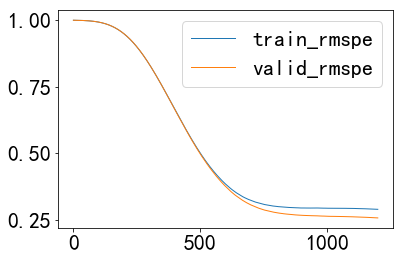

In [242]:
#查看loss 记录+
train_log = evals_result['train']
valid_log = evals_result['valid']
show_num = 1200
if(show_num >0):
    log_index = np.arange(show_num)#len(train_log['rmspe_xgboost'])

    plt.plot(log_index,train_log['rmspe_xgboost'][0:show_num],linewidth = 1,label = 'train_rmspe')
    plt.legend()
    plt.plot(log_index,valid_log['rmspe_xgboost'][0:show_num],linewidth = 1,label = 'valid_rmspe')
    plt.legend()
else:
    log_index = np.arange(len(train_log['rmspe_xgboost']))
    plt.plot(log_index,train_log['rmspe_xgboost'],linewidth = 1,label = 'train_rmspe')
    plt.legend()
    plt.plot(log_index,valid_log['rmspe_xgboost'],linewidth = 1,label = 'valid_rmspe')
    plt.legend()
    
    

In [243]:
print("best best_ntree_limit",xgboost_model.best_ntree_limit)
print("best_score:",xgboost_model.best_score)
print("bst.best_iteration",xgboost_model.best_iteration)



best best_ntree_limit 25576
best_score: 0.110062
bst.best_iteration 25575


In [244]:
#lightgbm
'''
if 'Customers' in data_data.columns:
    data_data.drop(['Customers'],axis=1,inplace=True)
X_train = data_data[0:813766]
X_valid = data_data[813766::]

y_train = np.log1p(X_train.Sales)
y_valid = np.log1p(X_valid.Sales)

X_valid_sales =X_valid['Sales'] 
X_train.drop(['Sales'],axis=1,inplace=True)
X_valid.drop(['Sales'],axis=1,inplace=True)

lgb_train = lgb.Dataset(X_train,y_train)
lgb_eval = lgb.Dataset(X_valid,y_valid,reference=lgb_train)

num_boost_round = 100
params = {
    'task':'train',
    'boosting_type':'gbdt',
    'objective':'regression',
    'metric':{'l2','mae'},
    'num_leaves':31,
    'learning_rate':0.2,
    'feature_fraction':0.9,
    'bagging_fraction':0.8,
    'bagging_freq':5,
    'verbose':0,
    'max_depth':10
}

gbm = lgb.train(params,lgb_train,num_boost_round=num_boost_round,valid_sets=lgb_eval,early_stopping_rounds=5)
 
y_pre = gbm.predict(X_valid,num_iteration=gbm.best_iteration)
#print(mean_squared_error(y_valid,lgb_predit) ** 0.5)
print("............... valid ...................")
print(y_pre)
'''


'\nif \'Customers\' in data_data.columns:\n    data_data.drop([\'Customers\'],axis=1,inplace=True)\nX_train = data_data[0:813766]\nX_valid = data_data[813766::]\n\ny_train = np.log1p(X_train.Sales)\ny_valid = np.log1p(X_valid.Sales)\n\nX_valid_sales =X_valid[\'Sales\'] \nX_train.drop([\'Sales\'],axis=1,inplace=True)\nX_valid.drop([\'Sales\'],axis=1,inplace=True)\n\nlgb_train = lgb.Dataset(X_train,y_train)\nlgb_eval = lgb.Dataset(X_valid,y_valid,reference=lgb_train)\n\nnum_boost_round = 100\nparams = {\n    \'task\':\'train\',\n    \'boosting_type\':\'gbdt\',\n    \'objective\':\'regression\',\n    \'metric\':{\'l2\',\'mae\'},\n    \'num_leaves\':31,\n    \'learning_rate\':0.2,\n    \'feature_fraction\':0.9,\n    \'bagging_fraction\':0.8,\n    \'bagging_freq\':5,\n    \'verbose\':0,\n    \'max_depth\':10\n}\n\ngbm = lgb.train(params,lgb_train,num_boost_round=num_boost_round,valid_sets=lgb_eval,early_stopping_rounds=5)\n \ny_pre = gbm.predict(X_valid,num_iteration=gbm.best_iteration)\n#p

In [245]:
#预测数据
#model_name="model/num20000_weight3_maxdepth6_eta0.01.model"
print(model_name)
xgboost_model = xgb.Booster(model_file=model_name)
y_pre = xgboost_model.predict(dvalid)


print(y_pre)
print('y_pre',len(y_pre))
print(len(y_valid))
print('X_valid_sales',len(X_valid_sales))
print(type(y_valid))

#load_model = booster.load_model('model/num20_w3_eta001.model')
#error = rmspe(np.expm1(y_valid.values), np.expm1(y_pre))
error = rmspe(np.expm1(y_valid.values),np.expm1(y_pre))
#print(type(np.expm1(y_pre)))
#print(type(y_valid.values))
print("*********************")
print((y_pre))
#print("pre:",y_pre)
print("valid_value:",y_valid.values)
#print(error)
print('RMSPE: {:.6f}'.format(error))

model/num40000_weight3_maxdepth8_eta0.005.model
[8.605976 8.657284 9.038068 ... 8.630909 9.950453 8.836517]
y_pre 13420
13420
X_valid_sales 13420
<class 'pandas.core.series.Series'>
*********************
[8.605976 8.657284 9.038068 ... 8.630909 9.950453 8.836517]
valid_value: [ 8.56864647  8.71028982  9.02581639 ...  8.59359852 10.03613731
  8.89082358]
RMSPE: 0.110105


In [246]:
''' 

#lightgbm 整合预测数据
print("********************* test ***************************")
y_test =  gbm.predict(data_test,num_iteration=gbm.best_iteration)
y_test = np.expm1(y_test)
print(y_test)
noOpen_nums = data_test_noPenIds.shape[0]
test_noOpen_data = np.zeros(noOpen_nums)

result_noOpen={'Id':data_test_noPenIds,'Sales':test_noOpen_data}
result_noOpen = pd.DataFrame(result_noOpen)
print(result_noOpen['Sales'])
print("&&&&&&&&&&&&&&&&&&&&&&&")
print(data_test_noPenIds.shape)
print(result_noOpen)

result={'Id':data_test_ids,'Sales':y_test}
print(type(result))
result = pd.DataFrame(result)
print(result)

#数据整合
result_total = result.append(result_noOpen)
print(result_total.shape)
print(result_total)
print("%%%%%%%%%%%%%%%%%%")
result_total.sort_values(by = 'Id',axis = 0,ascending = True,inplace=True)

result_total.to_csv ("data/result_light.csv" , encoding = "utf-8",index=False)
print(result_total.index)
'''

' \n\n#lightgbm 整合预测数据\nprint("********************* test ***************************")\ny_test =  gbm.predict(data_test,num_iteration=gbm.best_iteration)\ny_test = np.expm1(y_test)\nprint(y_test)\nnoOpen_nums = data_test_noPenIds.shape[0]\ntest_noOpen_data = np.zeros(noOpen_nums)\n\nresult_noOpen={\'Id\':data_test_noPenIds,\'Sales\':test_noOpen_data}\nresult_noOpen = pd.DataFrame(result_noOpen)\nprint(result_noOpen[\'Sales\'])\nprint("&&&&&&&&&&&&&&&&&&&&&&&")\nprint(data_test_noPenIds.shape)\nprint(result_noOpen)\n\nresult={\'Id\':data_test_ids,\'Sales\':y_test}\nprint(type(result))\nresult = pd.DataFrame(result)\nprint(result)\n\n#数据整合\nresult_total = result.append(result_noOpen)\nprint(result_total.shape)\nprint(result_total)\nprint("%%%%%%%%%%%%%%%%%%")\nresult_total.sort_values(by = \'Id\',axis = 0,ascending = True,inplace=True)\n\nresult_total.to_csv ("data/result_light.csv" , encoding = "utf-8",index=False)\nprint(result_total.index)\n'

In [247]:
'''
learn_model = xgb.cv(params, dtrain, 1500,feval=rmspe_xgboost,verbose_eval=10)
print("sss")
'''

'\nlearn_model = xgb.cv(params, dtrain, 1500,feval=rmspe_xgboost,verbose_eval=10)\nprint("sss")\n'

In [248]:
'''
#print(learn_model)
learn_model.loc[30:,["test-rmspe_xgboost-mean", "train-rmspe_xgboost-mean"]].plot()
print('y_pre',len(y_pre))
print(len(y_valid))
print('X_valid_sales',len(X_valid_sales))
'''

'\n#print(learn_model)\nlearn_model.loc[30:,["test-rmspe_xgboost-mean", "train-rmspe_xgboost-mean"]].plot()\nprint(\'y_pre\',len(y_pre))\nprint(len(y_valid))\nprint(\'X_valid_sales\',len(X_valid_sales))\n'

<Figure size 432x288 with 0 Axes>

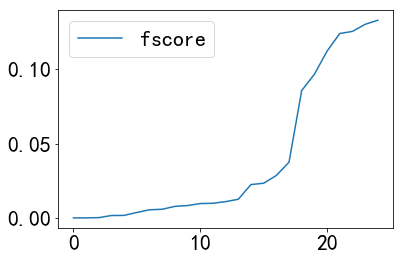

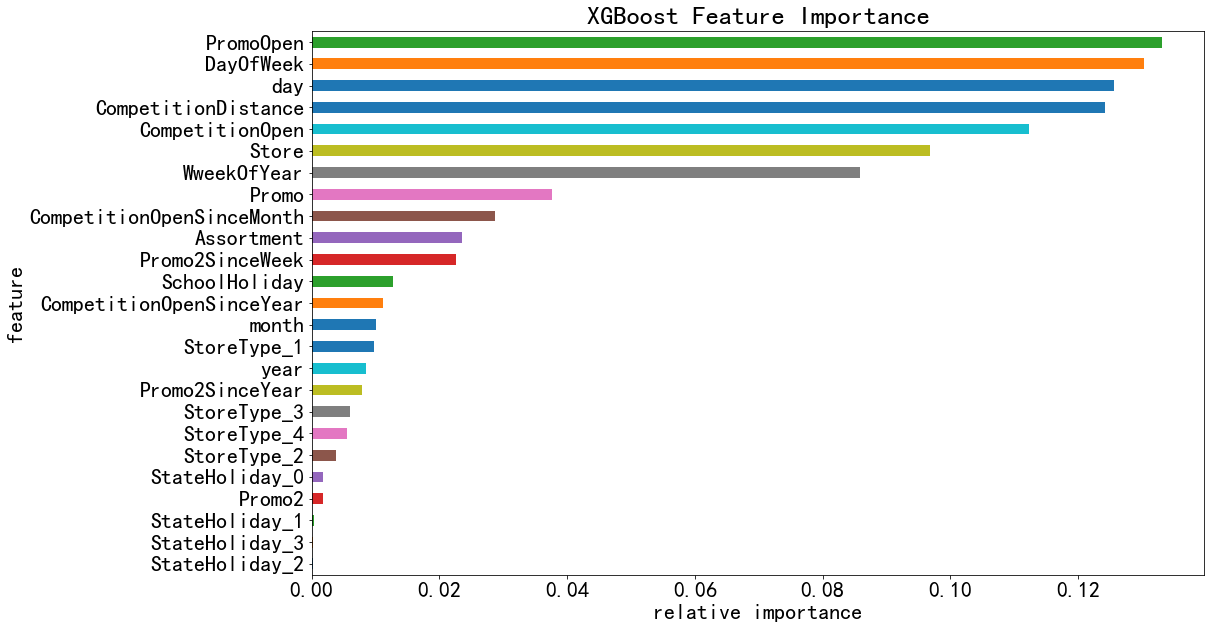

In [249]:
#特征重要性
import operator
importance = xgboost_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

plt.show()



In [250]:
#测试数据集预测
#dtest_ids = data_test['Id']
#data_test.drop(['Id'],axis=1,inplace=True)
if 'Date' in data_test.columns:
    data_test.drop(['Date'],axis=1,inplace=True)

dtest = xgb.DMatrix(data_test)
print(data_test.shape)
#data_test_s0 = data_test['SchoolHoliday_0']
#data_test_s1 = data_test['SchoolHoliday_1']
#data_test.drop('SchoolHoliday_0',axis=1,inplace=True)
#data_test.drop('SchoolHoliday_1',axis=1,inplace=True)
#data_test.insert(18,'SchoolHoliday_0',data_test_s0)
#data_test.insert(19,'SchoolHoliday_1',data_test_s1)

print(data_test.columns.values)
print("%%%%%%%%%%%%%%%%%%%")
print(X_train.shape)
print(X_train.columns.values)
y_test = xgboost_model.predict(dtest)


y_test = np.expm1(y_test)
print(y_test)

print('y_pre',y_pre.shape)
print(len(y_valid))
print('X_valid_sales',X_valid_sales.shape)



(35104, 26)
['Assortment' 'CompetitionDistance' 'CompetitionOpen'
 'CompetitionOpenSinceMonth' 'CompetitionOpenSinceYear' 'DayOfWeek' 'Open'
 'Promo' 'Promo2' 'Promo2SinceWeek' 'Promo2SinceYear' 'PromoOpen'
 'SchoolHoliday' 'StateHoliday_0' 'StateHoliday_1' 'StateHoliday_2'
 'StateHoliday_3' 'Store' 'StoreType_1' 'StoreType_2' 'StoreType_3'
 'StoreType_4' 'WweekOfYear' 'day' 'month' 'year']
%%%%%%%%%%%%%%%%%%%
(830918, 26)
['Assortment' 'CompetitionDistance' 'CompetitionOpen'
 'CompetitionOpenSinceMonth' 'CompetitionOpenSinceYear' 'DayOfWeek' 'Open'
 'Promo' 'Promo2' 'Promo2SinceWeek' 'Promo2SinceYear' 'PromoOpen'
 'SchoolHoliday' 'StateHoliday_0' 'StateHoliday_1' 'StateHoliday_2'
 'StateHoliday_3' 'Store' 'StoreType_1' 'StoreType_2' 'StoreType_3'
 'StoreType_4' 'WweekOfYear' 'day' 'month' 'year']
[ 4228.291   7502.546   9694.652  ...  6611.409  22812.105   7334.6846]
y_pre (13420,)
13420
X_valid_sales (13420,)


In [251]:
print('y_pre',y_pre.shape)
print(len(y_valid))
print('X_valid_sales',X_valid_sales.shape)


y_pre (13420,)
13420
X_valid_sales (13420,)


In [252]:
result={'Id':data_test_ids,'Sales':y_test}
print(type(result))
result = pd.DataFrame(result)
print(result)


<class 'dict'>
          Id         Sales
0          1   4228.291016
1          2   7502.545898
2          3   9694.652344
3          4   7127.572266
4          5   7125.186523
5          6   6437.021973
6          7   7782.390625
7          8   7723.786133
8          9   5560.084961
9         10   5829.596680
10        11   6795.373047
11        12   7778.309082
12        13   7001.529785
13        14   8261.288086
14        15   5683.287598
15        16   4725.478027
16        17   5454.375488
17        18  10010.757812
18        19  10309.923828
19        20  10059.359375
20        21   7349.993652
21        22   4727.605957
22        23   5699.606445
23        24   4457.887695
24        25   7791.221191
25        26  11259.708984
26        27   8996.379883
27        28   5714.756348
28        29   5317.873047
29        30   4149.215332
...      ...           ...
41058  41059   3284.533447
41059  41060   6067.229004
41060  41061   6691.108887
41061  41062  11411.031250
41062  41063 

In [253]:
#处理open=0 的数据
print(result.loc[(result['Id']==544)])
print("******************************")
noOpen_nums = data_test_noPenIds.shape[0]
test_noOpen_data = np.zeros(noOpen_nums)

result_noOpen={'Id':data_test_noPenIds,'Sales':test_noOpen_data}
result_noOpen = pd.DataFrame(result_noOpen)
print(result_noOpen['Sales'])
print("&&&&&&&&&&&&&&&&&&&&&&&")
print(data_test_noPenIds.shape)
print(result_noOpen)


Empty DataFrame
Columns: [Id, Sales]
Index: []
******************************
543      0.0
676      0.0
840      0.0
1399     0.0
1532     0.0
1696     0.0
2255     0.0
2388     0.0
2552     0.0
3111     0.0
3244     0.0
3408     0.0
3424     0.0
3425     0.0
3426     0.0
3427     0.0
3428     0.0
3429     0.0
3430     0.0
3431     0.0
3432     0.0
3433     0.0
3434     0.0
3435     0.0
3436     0.0
3437     0.0
3438     0.0
3439     0.0
3440     0.0
3441     0.0
        ... 
40200    0.0
40201    0.0
40202    0.0
40203    0.0
40204    0.0
40205    0.0
40206    0.0
40207    0.0
40208    0.0
40209    0.0
40210    0.0
40211    0.0
40212    0.0
40213    0.0
40214    0.0
40215    0.0
40218    0.0
40219    0.0
40220    0.0
40221    0.0
40222    0.0
40223    0.0
40224    0.0
40225    0.0
40226    0.0
40227    0.0
40228    0.0
40229    0.0
40230    0.0
40231    0.0
Name: Sales, Length: 5984, dtype: float64
&&&&&&&&&&&&&&&&&&&&&&&
(5984,)
          Id  Sales
543      544    0.0
676      677   

In [254]:
result_total = result.append(result_noOpen)
print(result_total.shape)
print(result_total)
print("%%%%%%%%%%%%%%%%%%")
result_total.sort_values(by = 'Id',axis = 0,ascending = True,inplace=True)

result_total.to_csv ("data/result.csv" , encoding = "utf-8",index=False)
print(result_total.index)

(41088, 2)
          Id         Sales
0          1   4228.291016
1          2   7502.545898
2          3   9694.652344
3          4   7127.572266
4          5   7125.186523
5          6   6437.021973
6          7   7782.390625
7          8   7723.786133
8          9   5560.084961
9         10   5829.596680
10        11   6795.373047
11        12   7778.309082
12        13   7001.529785
13        14   8261.288086
14        15   5683.287598
15        16   4725.478027
16        17   5454.375488
17        18  10010.757812
18        19  10309.923828
19        20  10059.359375
20        21   7349.993652
21        22   4727.605957
22        23   5699.606445
23        24   4457.887695
24        25   7791.221191
25        26  11259.708984
26        27   8996.379883
27        28   5714.756348
28        29   5317.873047
29        30   4149.215332
...      ...           ...
40200  40201      0.000000
40201  40202      0.000000
40202  40203      0.000000
40203  40204      0.000000
40204  40205     

In [255]:
#print(result.loc[(result['Id']==41088)])

In [256]:
#从验证集合
'''
import random
#print(type(X_valid_sales))
random_i = random.randint(0,150)
data_size = 200
print("random_i",random_i)
print(X_valid_sales.shape)
print(y_pre.shape)
print(np.expm1(y_pre[random_i*data_size:(random_i+1)*data_size]))
#print(y_valid[random_i*data_size:(random_i+1)*data_size])
fig = plt.figure(figsize=(20,8))
x_index = np.arange(200)
print(x_index)
plt.plot(x_index,X_valid_sales[random_i*data_size:(random_i+1)*data_size],linewidth = 1,label = 'valid_label')
plt.legend()
plt.plot(x_index,np.expm1(y_pre[random_i*data_size:(random_i+1)*data_size]),linewidth = 1,label = 'valid_predict')
plt.legend()
plt.title('随机获取200条记录验证集预测情况')
plt.xlabel('数据ID')
plt.ylabel('销售额')
plt.savefig('predict_1.jpg')
'''

'\nimport random\n#print(type(X_valid_sales))\nrandom_i = random.randint(0,150)\ndata_size = 200\nprint("random_i",random_i)\nprint(X_valid_sales.shape)\nprint(y_pre.shape)\nprint(np.expm1(y_pre[random_i*data_size:(random_i+1)*data_size]))\n#print(y_valid[random_i*data_size:(random_i+1)*data_size])\nfig = plt.figure(figsize=(20,8))\nx_index = np.arange(200)\nprint(x_index)\nplt.plot(x_index,X_valid_sales[random_i*data_size:(random_i+1)*data_size],linewidth = 1,label = \'valid_label\')\nplt.legend()\nplt.plot(x_index,np.expm1(y_pre[random_i*data_size:(random_i+1)*data_size]),linewidth = 1,label = \'valid_predict\')\nplt.legend()\nplt.title(\'随机获取200条记录验证集预测情况\')\nplt.xlabel(\'数据ID\')\nplt.ylabel(\'销售额\')\nplt.savefig(\'predict_1.jpg\')\n'

min: -16074
max: 5626


Text(0,0.5,'count')

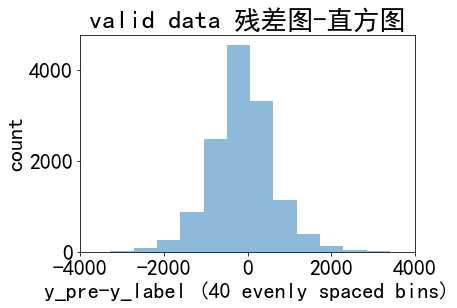

In [257]:
#残差图
valid_sub = np.expm1(y_pre) - X_valid_sales
#print(valid_sub)
print('min:',math.ceil(min(valid_sub)))
print('max:',math.floor(max(valid_sub)))
bins = np.linspace(math.ceil(min(valid_sub)),
                   math.floor(max(valid_sub)),40) # fixed number of bins
plt.xlim([-4000, 4000])
 
plt.hist(valid_sub, bins=bins, alpha=0.5)
plt.title('valid data 残差图-直方图')
plt.xlabel('y_pre-y_label (40 evenly spaced bins)')
plt.ylabel('count')

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            13410, 13411, 13412, 13413, 13414, 13415, 13416, 13417, 13418,
            13419],
           dtype='int64', length=13420)


Text(0.5,1,'检验集的残差散点图')

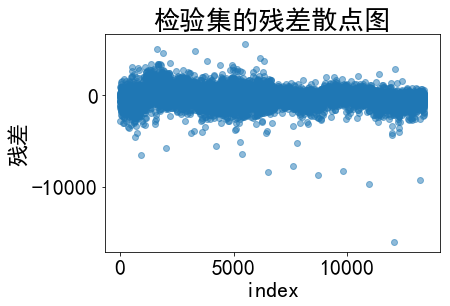

In [258]:
#散点图
print(X_valid_sales.index)
plt.scatter(X_valid_sales.index,valid_sub,alpha=0.5,label='检验集残差')
plt.xlabel("index")
plt.ylabel("残差")
plt.title("检验集的残差散点图")

### 

##### 